In [139]:
# –Ü–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö—ñ–¥–Ω–∏—Ö –±—ñ–±–ª—ñ–æ—Ç–µ–∫
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sk

# –Ü–º–ø–æ—Ä—Ç –±—ñ–±–ª—ñ–æ—Ç–µ–∫ –¥–ª—è –º–æ–¥–µ–ª—é–≤–∞–Ω–Ω—è
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
from scipy.stats import f_oneway, kruskal
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR


print('–Ü–º–ø–æ—Ä—Ç –±—ñ–±–ª—ñ–æ—Ç–µ–∫ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.')


–Ü–º–ø–æ—Ä—Ç –±—ñ–±–ª—ñ–æ—Ç–µ–∫ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.


### –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö —Ç–∞ –ø–µ—Ä–≤–∏–Ω–Ω–∏–π –æ–≥–ª—è–¥

–ó–∞–≤–∞–Ω—Ç–∞–∂—É—î–º–æ –¥–∞—Ç–∞—Å–µ—Ç —Ç–∞ –ø–µ—Ä–µ–≥–ª—è–¥–∞—î–º–æ –ø–µ—Ä—à—ñ —Ä—è–¥–∫–∏, —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—é —Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —á–∏—Å–ª–æ–≤–∏—Ö –æ–∑–Ω–∞–∫.

In [140]:
file_name = 'ikea.csv'
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

if not os.path.exists(file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as file:
            file.write(response.content)

df = pd.read_csv(file_name)

df = pd.read_table(file_name,sep=',')

print('–ü–µ—Ä—à—ñ 5 —Ä—è–¥–∫—ñ–≤ –¥–∞–Ω–∏—Ö:')
print(df.head().to_markdown())

print('\n–Ü–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ –¥–∞–Ω—ñ:')
print(df.info())

print('\n–°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∏–π –æ–ø–∏—Å –¥–∞–Ω–∏—Ö:')
print(df.describe().to_markdown())

–ü–µ—Ä—à—ñ 5 —Ä—è–¥–∫—ñ–≤ –¥–∞–Ω–∏—Ö:
|    |   Unnamed: 0 |   item_id | name                  | category      |   price | old_price    | sellable_online   | link                                                                                               | other_colors   | short_description                               | designer             |   depth |   height |   width |
|---:|-------------:|----------:|:----------------------|:--------------|--------:|:-------------|:------------------|:---------------------------------------------------------------------------------------------------|:---------------|:------------------------------------------------|:---------------------|--------:|---------:|--------:|
|  0 |            0 |  90420332 | FREKVENS              | Bar furniture |     265 | No old price | True              | https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/                         | No             | Bar table, in/outdoor,          51x51 cm   

## –ù–∞–∑–≤–∏ –∫–æ–ª–æ–Ω–æ–∫
- tem_id ‚Äî —É–Ω—ñ–∫–∞–ª—å–Ω–∏–π –Ω–æ–º–µ—Ä –ø—Ä–µ–¥–º–µ—Ç–∞

- name ‚Äî –Ω–∞–∑–≤–∞ –ø—Ä–µ–¥–º–µ—Ç–∞

- category ‚Äî –Ω–∞–∑–≤–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó

- price ‚Äî —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—É

- old_price ‚Äî —î —á–∏ –Ω–µ–º–∞—î —Å—Ç–∞—Ä–æ—ó —Ü—ñ–Ω–∏

- sellable_online ‚Äî —Ç–æ–≤–∞—Ä –Ω–∞ —ñ–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞—Ä–∫–µ—Ç—ñ

- link ‚Äî –ø–æ—Å–∏–ª–∞–Ω–Ω—è –Ω–∞ —Ç–æ–≤–∞—Ä –≤ –º–∞—Ä–∫–µ—Ç—ñ

- other_colors ‚Äî –¥–æ—Å—Ç—É–ø–Ω–∏–π —á–∏ –Ω–µ–º–∞—î —ñ–Ω—à–∏–π –∫–æ–ª—ñ—Ä –ø—Ä–µ–¥–º–µ—Ç–∞

- short_description ‚Äî –∫–æ—Ä–æ—Ç–∫–∞ —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ø—Ä–æ –ø—Ä–µ–¥–º–µ—Ç

- designer ‚Äî —ñ–º'—è –¥–∏–∑–∞–π–Ω–µ—Ä–∞

- depth ‚Äî –≥–ª–∏–±–∏–Ω–∞ –ø—Ä–µ–¥–º–µ—Ç–∞

- height ‚Äî –≤–∏—Å–æ—Ç–∞ –ø—Ä–µ–¥–º–µ—Ç–∞

- width ‚Äî —à–∏—Ä–∏–Ω–∞ –µ–ª–µ–º–µ–Ω—Ç–∞


**–û–ø–∏—Å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∏—Ö –¥–∞–Ω–∏—Ö**:

- Unnamed: 0. –ü–æ—Ä—è–¥–∫–æ–≤–∏–π –Ω–æ–º–µ—Ä –∑–∞–ø–∏—Å—É. –ó–Ω–∞—á–µ–Ω–Ω—è –≤–∞—Ä—ñ—é—é—Ç—å—Å—è –≤—ñ–¥ 0 –¥–æ 3693. –ú–∞—î —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª.

- item_id. –£–Ω—ñ–∫–∞–ª—å–Ω–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä —Ç–æ–≤–∞—Ä—É. –í—Å—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —î –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–º–∏. –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è ‚âà 58 487, –º–∞–∫—Å–∏–º–∞–ª—å–Ω–µ ‚âà 99 932 620. –ó–Ω–∞—á–Ω–∏–π —Ä–æ–∑–∫–∏–¥ –∑–Ω–∞—á–µ–Ω—å.

- price. –¶—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—É. –î—ñ–∞–ø–∞–∑–æ–Ω: 3 ‚Äì 9 585. –°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ ‚âà 1078, –º–µ–¥—ñ–∞–Ω–∞ 544,7.
–í–µ–ª–∏–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö—ñ–ª–µ–Ω–Ω—è (1374,65), —â–æ –≤–∫–∞–∑—É—î –Ω–∞ —Å–∏–ª—å–Ω—É –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω—ñ—Å—Ç—å.

- depth. –ì–ª–∏–±–∏–Ω–∞ —Ç–æ–≤–∞—Ä—É (–≤ —Å–∞–Ω—Ç–∏–º–µ—Ç—Ä–∞—Ö). –í—ñ–¥ 1 –¥–æ 257. –ú–µ–¥—ñ–∞–Ω–∞ = 47, —Å–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è ‚âà 54,4. –î–µ—è–∫—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –º–æ–∂—É—Ç—å –±—É—Ç–∏ –≤–∏–∫–∏–¥–∞–º–∏.

- height. –í–∏—Å–æ—Ç–∞ —Ç–æ–≤–∞—Ä—É.–í—ñ–¥ 1 –¥–æ 700. –°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è ‚âà 101,7, –º–µ–¥—ñ–∞–Ω–∞ 83. –í–µ–ª–∏–∫–∞ –¥–∏—Å–ø–µ—Ä—Å—ñ—è, –º–æ–∂–ª–∏–≤—ñ –≤–∏–∫–∏–¥–∏.

- width. –®–∏—Ä–∏–Ω–∞ —Ç–æ–≤–∞—Ä—É. –í—ñ–¥ 1 –¥–æ 420. –ú–µ–¥—ñ–∞–Ω–∞ = 80, —Å–µ—Ä–µ–¥–Ω—î ‚âà 104,5. –ú–æ–∂–ª–∏–≤—ñ –≤–∏–∫–∏–¥–∏.

### –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –Ω–∞ –≤—ñ–¥—Å—É—Ç–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è


In [141]:
print('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –≤—ñ–¥—Å—É—Ç–Ω—ñ—Ö –∑–Ω–∞—á–µ–Ω—å –ø–æ –∫–æ–∂–Ω—ñ–π –∑–º—ñ–Ω–Ω—ñ–π:')
print(df.isnull().sum().to_markdown())

–ö—ñ–ª—å–∫—ñ—Å—Ç—å –≤—ñ–¥—Å—É—Ç–Ω—ñ—Ö –∑–Ω–∞—á–µ–Ω—å –ø–æ –∫–æ–∂–Ω—ñ–π –∑–º—ñ–Ω–Ω—ñ–π:
|                   |    0 |
|:------------------|-----:|
| Unnamed: 0        |    0 |
| item_id           |    0 |
| name              |    0 |
| category          |    0 |
| price             |    0 |
| old_price         |    0 |
| sellable_online   |    0 |
| link              |    0 |
| other_colors      |    0 |
| short_description |    0 |
| designer          |    0 |
| depth             | 1463 |
| height            |  988 |
| width             |  589 |


–í–∏—è–≤–ª–µ–Ω–æ, —â–æ —É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö —î –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —É –∫–æ–ª–æ–Ω–∫–∞—Ö: depth, height, width.

### –í–∏–¥–∞–ª–∏–º–æ –¥—É–±–ª—ñ–∫–∞—Ç–∏

In [142]:
df=df.drop_duplicates(subset=['item_id'], keep='first').copy()

#–ø–µ—Ä–µ–≤—ñ—Ä–∫–∞
df.shape


(2962, 14)

### –í—ñ–¥—Å—ñ—î–º–æ —Å—É—Ç–Ω—ñ—Å–Ω—ñ –¥—É–±–ª—ñ–∫–∞—Ç–∏
- –∑–Ω–∞–π–¥–µ–º–æ —Ç–æ–≤–∞—Ä–∏ –∑ –æ–¥–Ω–∞–∫–æ–≤–æ—é –Ω–∞–∑–≤–æ—é, —É —è–∫–∏—Ö —Ä–æ–∑–º—ñ—Ä–∏ –≤—ñ–¥—Ä—ñ–∑–Ω—è—é—Ç—å—Å—è –Ω–µ –±—ñ–ª—å—à–µ –Ω—ñ–∂ –Ω–∞ 5%
- –≤–∏–¥–∞–ª–∏–º–æ —Ç–æ–≤–∞—Ä–∏ –∑ –æ–¥–∏–Ω–∞–∫–æ–≤–∏–º –æ–ø–∏—Å–æ–º

In [143]:
# –°—É–º–∞ —Ä–æ–∑–º—ñ—Ä—ñ–≤ –¥–ª—è –æ—Ü—ñ–Ω–∫–∏ –∑–∞–≥–∞–ª—å–Ω–æ–≥–æ —Ä–æ–∑–º—ñ—Ä—É
df['size'] = df[['depth', 'width', 'height']].sum(axis=1)

# –§—ñ–ª—å—Ç—Ä—É—î–º–æ —Ç–æ–≤–∞—Ä–∏, –¥–µ —Ä—ñ–∑–Ω–∏—Ü—è –≤ —Ä–æ–∑–º—ñ—Ä–∞—Ö –Ω–µ –±—ñ–ª—å—à–µ –Ω—ñ–∂ –Ω–∞ 5% –¥–ª—è –æ–¥–Ω–∞–∫–æ–≤–∏—Ö –Ω–∞–∑–≤ —É –º–µ–∂–∞—Ö –æ–¥–Ω—ñ—î—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
df_duplicates = df.groupby(['category', 'name']).filter(
    lambda x: (x['size'].min() != 0) and (x['size'].max() - x['size'].min()) / x['size'].min() <= 0.05
)

# –í–∏–¥–∞–ª—è—î–º–æ –¥—É–±–ª—ñ–∫–∞—Ç–∏ –∑–∞ –∫–æ—Ä–æ—Ç–∫–∏–º –æ–ø–∏—Å–æ–º —ñ –Ω–∞–∑–≤–æ—é –≤ –º–µ–∂–∞—Ö –æ–¥–Ω—ñ—î—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
df_filtered = df_duplicates.drop_duplicates(subset=['short_description', 'name', 'category'])



# –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞

df.shape

(2962, 15)

### –í–∏–¥–∞–ª–∏–º–æ –∫–æ–ª–æ–Ω–∫–∏, —è–∫—ñ –Ω–µ –Ω–µ—Å—É—Ç—å –≤ —Å–æ–±—ñ —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—ñ

In [144]:
df = df.drop(['item_id', 'link', 'Unnamed: 0'], axis= 1)

#–ø–µ—Ä–µ–≤—ñ—Ä–∫–∞
df.shape

(2962, 12)

### –û—á–∏—Å—Ç–∏–º–æ –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤

In [145]:
#—Å—Ç–≤–æ—Ä–∏–º–æ —Ñ—É–Ω–∫—Ü—ñ—é –¥–ª—è –æ—á–∏—â–µ–Ω–Ω—è –∫–æ–ª–æ–Ω–∫–∏ 'designer'
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value

    if len(value)>0 and value[0].isdigit():
        return emptyValue

    designers = value.split("/")

    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [146]:
df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))
df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [147]:
df['designer_clean'].value_counts()

designer_clean
IKEA of Sweden                                    785
Ehl√©n Johansson/IKEA of Sweden                    138
Ehl√©n Johansson                                   136
Francis Cayouette                                 131
Ola Wihlborg                                      128
                                                 ... 
Gustav Carlberg/IKEA of Sweden/Johanna Asshoff      1
Chris Martin/IKEA of Sweden                         1
J Karlsson/W Chong                                  1
Francis Cayouette/Gustav Carlberg                   1
Jomi Evers/Tina Christensen                         1
Name: count, Length: 199, dtype: int64

### –û—á–∏—Å—Ç–∏–º–æ –ø–æ —Å—Ç–∞—Ä–∏–º —Ü—ñ–Ω–∞–º

In [148]:
df['old_price'] = df['old_price'].replace('No old price', 'SR NaN')

list_price = []

for i in range(len(df)):
    old_price_value = df.iloc[i]['old_price']  # –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ iloc –¥–ª—è –∑–≤–µ—Ä–Ω–µ–Ω–Ω—è –ø–æ —ñ–Ω–¥–µ–∫—Å—É

    # –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞, —á–∏ —î –∑–Ω–∞—á–µ–Ω–Ω—è —Ä—è–¥–∫–æ–º
    if isinstance(old_price_value, str):
        price_parts = old_price_value.replace(',', '').replace('/', '.').strip().split(' ')
        item = 0 if price_parts[1] == 'NaN' else float(price_parts[1])
    else:
        # –Ø–∫—â–æ —Ü–µ —á–∏—Å–ª–æ, –ø—Ä–æ—Å—Ç–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ –π–æ–≥–æ
        item = old_price_value

    list_price.append(item)

df['old_price'] = list_price

print(df['old_price'].head().to_markdown())

|    |   old_price |
|---:|------------:|
|  0 |           0 |
|  1 |           0 |
|  2 |           0 |
|  3 |           0 |
|  4 |           0 |


In [149]:
print(df.columns)
df.info()
print(df.isnull().sum().to_markdown())

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width', 'size', 'designer_clean'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, 0 to 3692
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2962 non-null   object 
 1   category           2962 non-null   object 
 2   price              2962 non-null   float64
 3   old_price          2962 non-null   float64
 4   sellable_online    2962 non-null   bool   
 5   other_colors       2962 non-null   object 
 6   short_description  2962 non-null   object 
 7   designer           2962 non-null   object 
 8   depth              1844 non-null   float64
 9   height             2236 non-null   float64
 10  width              2520 non-null   float64
 11  size               2962 non-null   float64
 12  designer_clea

**–í–∏—Å–Ω–æ–≤–æ–∫** –Ω—É–ª—å–æ–≤—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –≤ —Ç—Ä—å–æ—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö

##–í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è

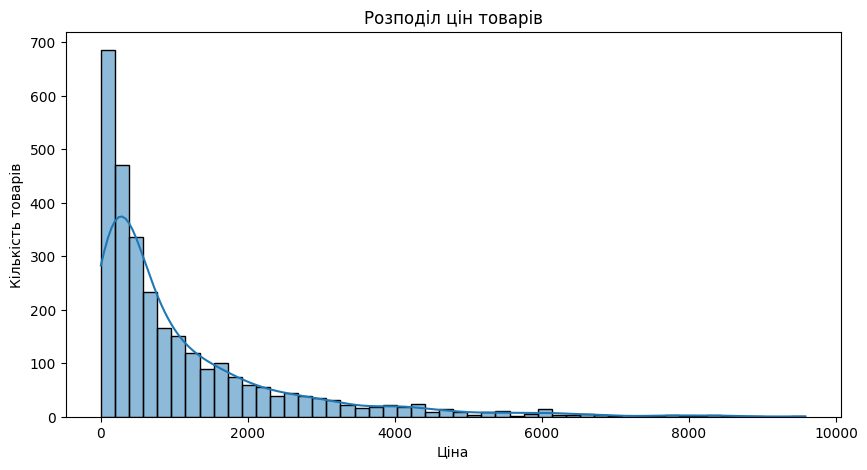

In [150]:
# –†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω —Ç–æ–≤–∞—Ä—ñ–≤')
plt.xlabel('–¶—ñ–Ω–∞')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤')
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** –±—ñ–ª—å—à—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤ –º–∞—é—Ç—å –Ω–∏–∑—å–∫—É —Ü—ñ–Ω—É. –†–æ–∑–ø–æ–¥—ñ–ª —î –∞—Å–∏–º–µ—Ç—Ä–∏—á–Ω–∏–º —ñ –º–∞—î –¥–æ–≤–≥–∏–π –ø—Ä–∞–≤–∏–π —Ö–≤—ñ—Å—Ç (–¥–æ–≤–æ–ª—ñ –º–∞–ª–æ —Ç–æ–≤–∞—Ä—ñ–≤ –º–∞—é—Ç—å –¥—É–∂–µ –≤–∏—Å–æ–∫—É —Ü—ñ–Ω—É). –†–æ–∑–ø–æ–¥—ñ–ª —ç –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–∏–π. –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ –¥–µ–º–æ–Ω—Å—Ç—Ä—É—î, —â–æ –ø–µ—Ä–µ–≤–∞–∂–Ω–∞ –±—ñ–ª—å—à—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤ –º–∞—é—Ç—å –≤—ñ–¥–Ω–æ—Å–Ω–æ –Ω–∏–∑—å–∫—É —Ü—ñ–Ω—É, –∞ —Ç–æ–≤–∞—Ä–∏ –∑ –≤–∏—Å–æ–∫–æ—é —Ü—ñ–Ω–æ—é –∑—É—Å—Ç—Ä—ñ—á–∞—é—Ç—å—Å—è –∑–Ω–∞—á–Ω–æ —Ä—ñ–¥—à–µ.

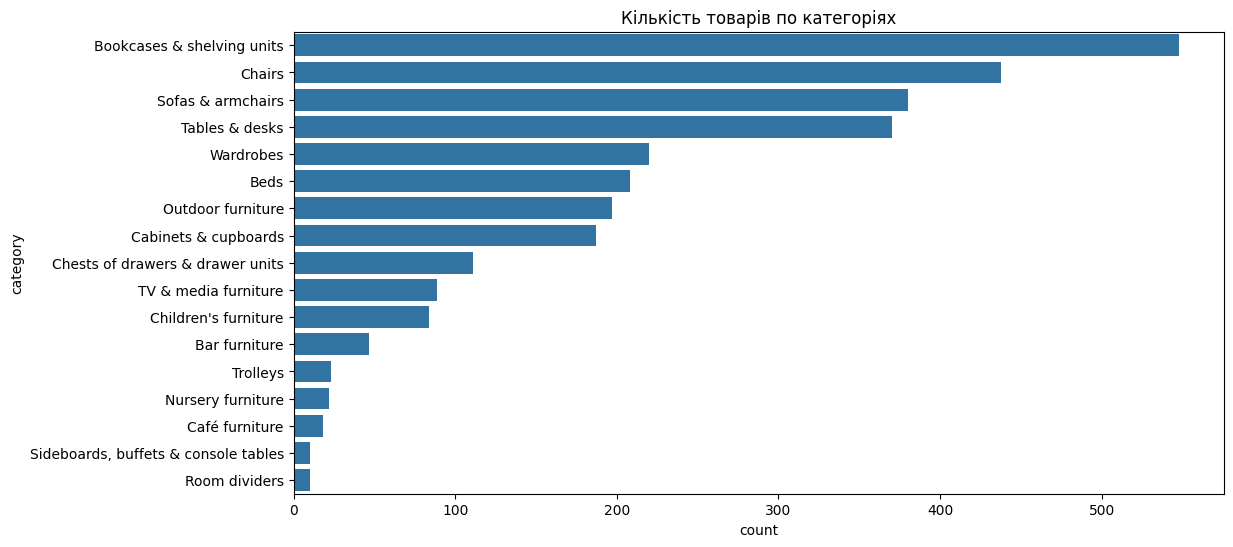

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['category'], order=df['category'].value_counts().index)
plt.title("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö")
plt.show()


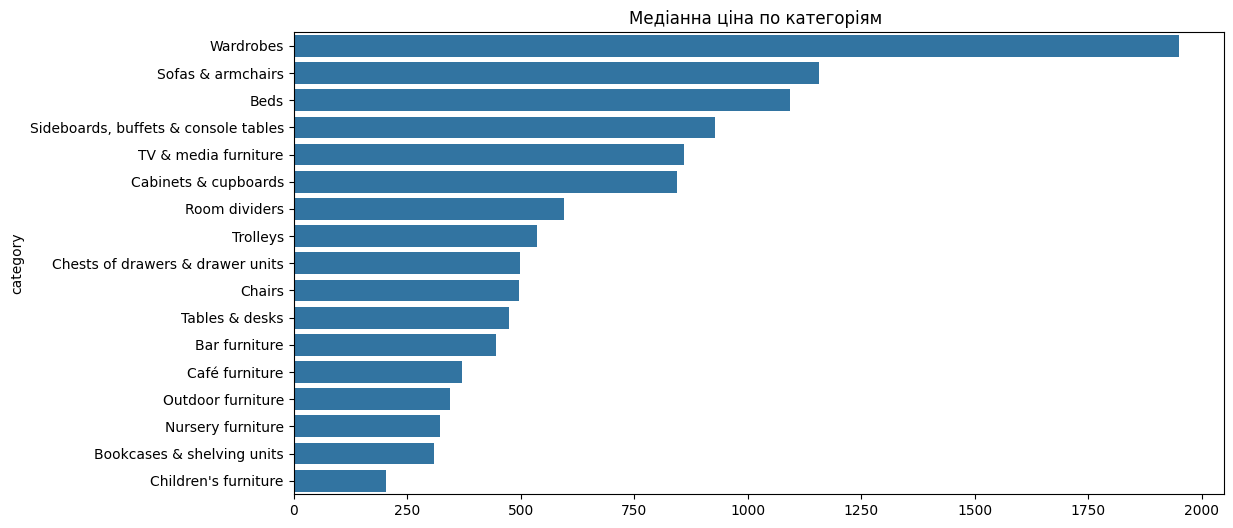

In [152]:
# –ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º
category_median_price=df.groupby('category')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=category_median_price.values, y=category_median_price.index)
plt.title("–ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º ")
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** –±–∞—á–∏–º–æ, —â–æ –Ω–∞–π–±—ñ–ª—å—à—É —Å–µ—Ä–µ–¥–Ω—é —Ü—ñ–Ω—É –º–∞—é—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó 'Wardrobes', 'Sofas & armchairs'

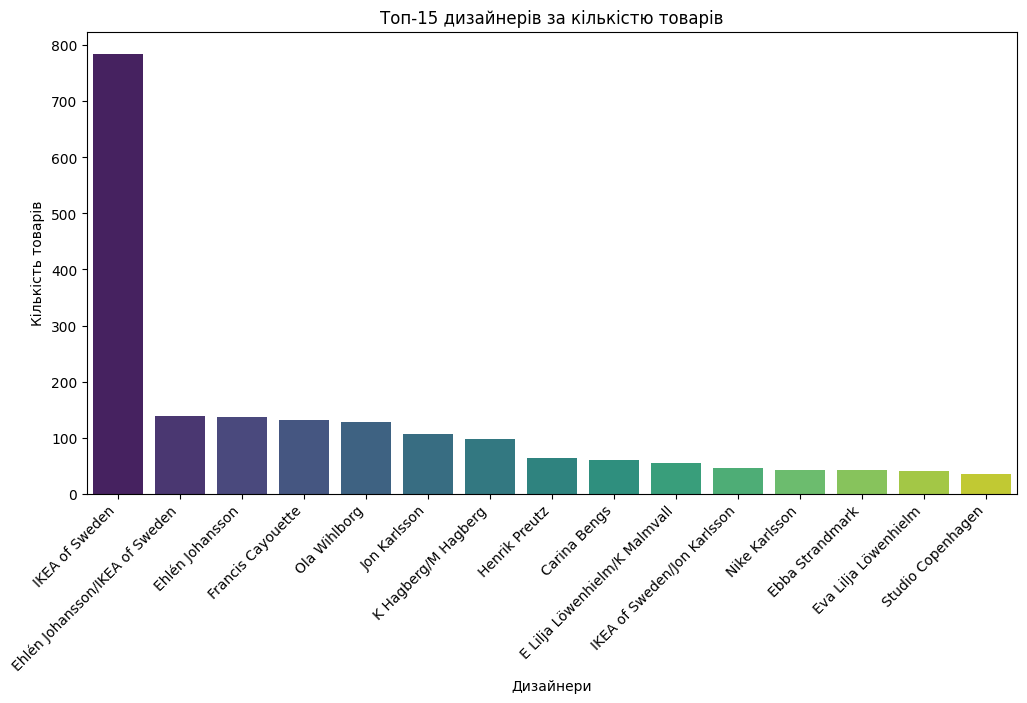

In [153]:
# –¢–æ–ø-15 –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤
plt.figure(figsize=(12,6))
designer_counts = df['designer_clean'].value_counts().head(15)
sns.barplot(x=designer_counts.index, y=designer_counts.values, hue=designer_counts.index, palette='viridis', legend=False)
plt.title("–¢–æ–ø-15 –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —Ç–æ–≤–∞—Ä—ñ–≤")
plt.xlabel('–î–∏–∑–∞–π–Ω–µ—Ä–∏')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤')
plt.xticks(rotation=45, ha='right')
plt.show()

In [154]:
designer_df_max=df.groupby('designer_clean')['price'].max()
print(designer_df_max)

designer_clean
A Fredriksson/H Preutz                                   75.0
A Fredriksson/HAY/J Hultqvist/W Chong                  2575.0
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        675.0
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         889.0
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    2575.0
                                                        ...  
Tina Christensen                                       2585.0
Tom Dixon                                              3900.0
Tord Bj√∂rklund                                         1195.0
Virgil Abloh                                            837.0
Wiebke Braasch                                          575.0
Name: price, Length: 199, dtype: float64


**–í–∏—Å–Ω–æ–≤–æ–∫** –Ω–∞–π–¥–æ—Ä–æ–∂—á–∏–π —Ç–æ–≤–∞—Ä —É –¥–∏–∑–∞–π–Ω–µ—Ä–∞ Tom Dixon

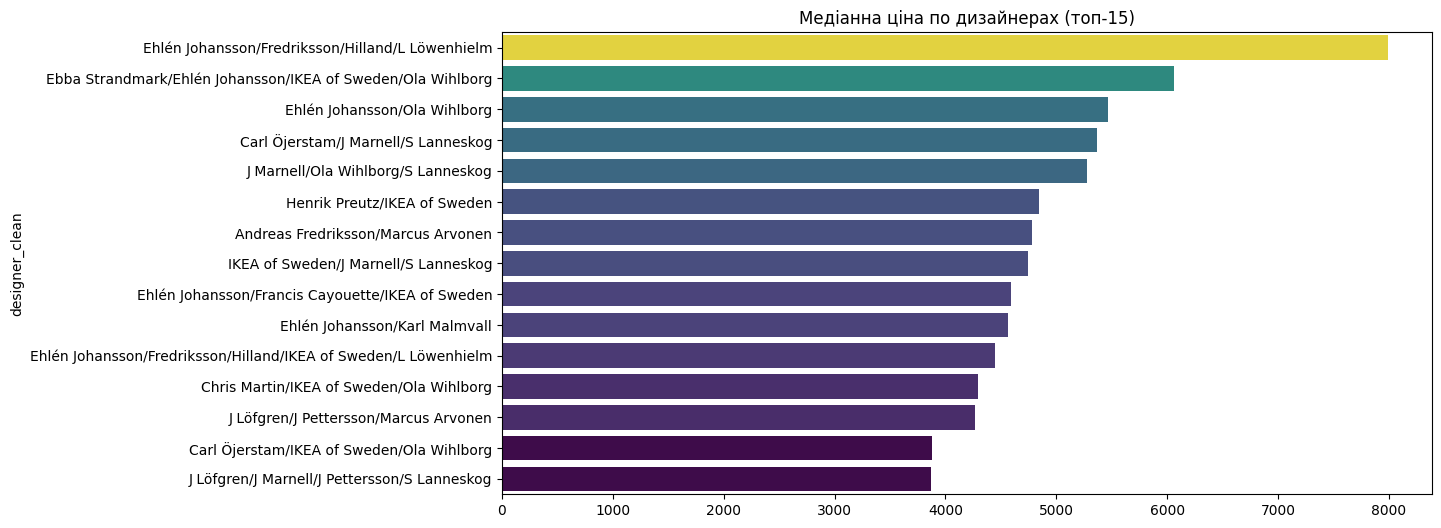

In [155]:
# –ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ –ø–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞—Ö
designer_median_price = df.groupby('designer_clean')['price'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=designer_median_price.values, y=designer_median_price.index, hue=designer_median_price.values, palette='viridis', legend=False)
plt.title("–ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ –ø–æ –¥–∏–∑–∞–π–Ω–µ—Ä–∞—Ö (—Ç–æ–ø-15)")
plt.show()


**–í–∏—Å–Ω–æ–≤–æ–∫** –Ω–∞–π–±—ñ–ª—å—à—ñ –º–µ–¥—ñ–∞–Ω–Ω—ñ —Ü—ñ–Ω–∏ –∑–æ—Å–µ—Ä–µ–¥–∂–µ–Ω—ñ —Å–µ—Ä–µ–¥ –¥–µ–∫—ñ–ª—å–∫–æ—Ö –¥–∏–∑–∞–π–Ω–µ—Ä—Å—å–∫–∏—Ö –≥—Ä—É–ø, –∞ IKEA –≤—ñ–¥—ñ–≥—Ä–∞—î –≤–∞–∂–ª–∏–≤—É —Ä–æ–ª—å —É —Ü—å–æ–º—É —Å–µ–≥–º–µ–Ω—Ç—ñ.

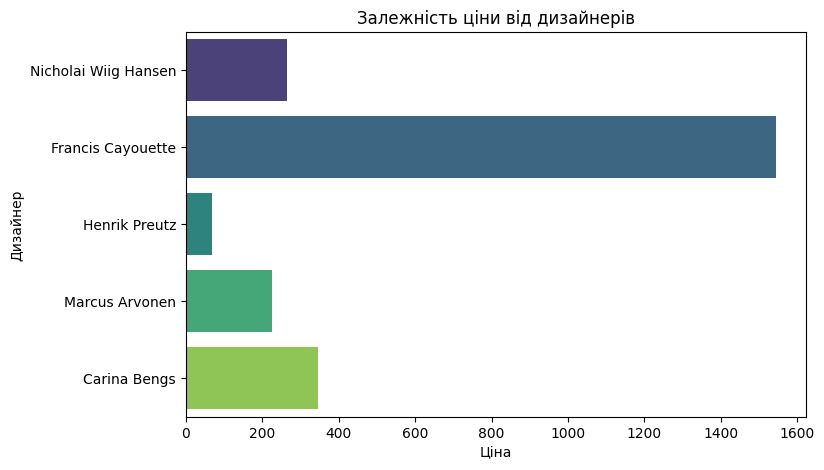

In [156]:
# –ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤
df1 = df[0:6]  # –í—ñ–∑—å–º–µ–º–æ –ø–µ—Ä—à–∏—Ö —à—ñ—Å—Ç—å –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤
plt.figure(figsize=(8, 5))
sns.barplot(x='price', y='designer_clean', data=df1, hue='designer_clean', palette='viridis', legend=False, errorbar=('ci', 0))
plt.title('–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤')
plt.xlabel('–¶—ñ–Ω–∞')
plt.ylabel('–î–∏–∑–∞–π–Ω–µ—Ä')
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** Francis Cayouette –º–∞—î –Ω–∞–π–¥–æ—Ä–æ–∂—á—ñ —Ç–æ–≤–∞—Ä–∏ —Å–µ—Ä–µ–¥ –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—Ö –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É. –ô–æ–≥–æ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –∑–Ω–∞—á–Ω–æ –ø–µ—Ä–µ–≤–∏—â—É—î —Ü—ñ–Ω–∏ —ñ–Ω—à–∏—Ö –¥–∏–∑–∞–π–Ω–µ—Ä—ñ–≤, –∞ —Ç–∞–∫–æ–∂ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è –≤–µ–ª–∏–∫–∞ –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω—ñ—Å—Ç—å —Ü—ñ–Ω.

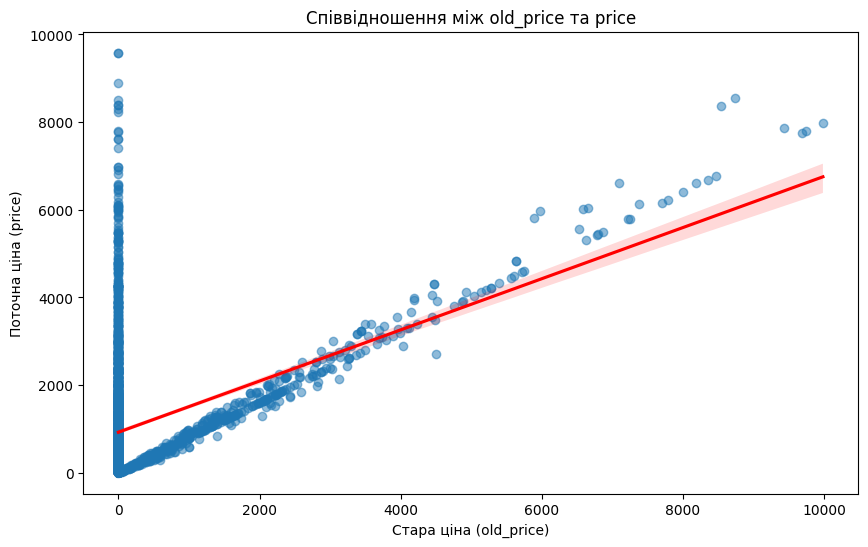

In [157]:
# –°–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è —Å—Ç–∞—Ä–æ—ó —Ü—ñ–Ω–∏ (old_price) —Ç–∞  –ø–æ—Ç–æ—á–Ω–æ—ó(price).
plt.figure(figsize=(10, 6))
sns.regplot(x='old_price', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('–°–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è –º—ñ–∂ old_price —Ç–∞ price')
plt.xlabel('–°—Ç–∞—Ä–∞ —Ü—ñ–Ω–∞ (old_price)')
plt.ylabel('–ü–æ—Ç–æ—á–Ω–∞ —Ü—ñ–Ω–∞ (price)')
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** —Ü—ñ–Ω–∏ –∑–∞–∑–≤–∏—á–∞–π –∑—Ä–æ—Å—Ç–∞—é—Ç—å –∞–±–æ –∑–∞–ª–∏—à–∞—é—Ç—å—Å—è –ø—Ä–∏–±–ª–∏–∑–Ω–æ –Ω–∞ —Ç–æ–º—É –∂ —Ä—ñ–≤–Ω—ñ, –∞–ª–µ —î –≤–∏–ø–∞–¥–∫–∏ —Ä—ñ–∑–∫–∏—Ö –∑–º—ñ–Ω, –æ—Å–æ–±–ª–∏–≤–æ –≤ –Ω–∏–∑—å–∫–æ–º—É —Ü—ñ–Ω–æ–≤–æ–º—É —Å–µ–≥–º–µ–Ω—Ç—ñ.


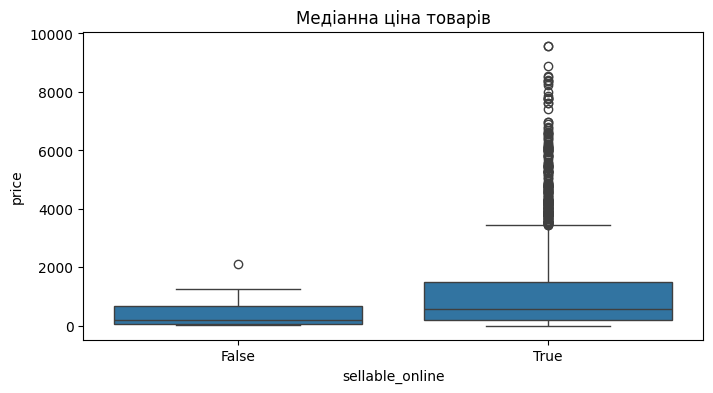

In [158]:
# –¶—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤, —â–æ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è / –Ω–µ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –æ–Ω–ª–∞–π–Ω
plt.figure(figsize=(8,4))
sns.boxplot(x=df['sellable_online'], y=df['price'])
plt.title("–ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤")
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** –¢–æ–≤–∞—Ä–∏, —è–∫—ñ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –æ–Ω–ª–∞–π–Ω (sellable_online = True), –º–∞—é—Ç—å –∑–Ω–∞—á–Ω–æ –±—ñ–ª—å—à—É –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω—ñ—Å—Ç—å —Ü—ñ–Ω, —É —Ç–æ–º—É —á–∏—Å–ª—ñ –±–∞–≥–∞—Ç–æ –¥–æ—Ä–æ–≥–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤ —ñ–∑ —Ü—ñ–Ω–∞–º–∏ –ø–æ–Ω–∞–¥ 4000, –∞ —Ç–∞–∫–æ–∂ –∑–Ω–∞—á–Ω—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –≤–∏–∫–∏–¥—ñ–≤. –ú–µ–¥—ñ–∞–Ω–Ω–∞ —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤, –¥–æ—Å—Ç—É–ø–Ω–∏—Ö –æ–Ω–ª–∞–π–Ω, –≤–∏—â–∞, –Ω—ñ–∂ —É —Ç–æ–≤–∞—Ä—ñ–≤, —è–∫—ñ –Ω–µ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –æ–Ω–ª–∞–π–Ω. –¶–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ —Ç–µ, —â–æ –¥–æ—Ä–æ–≥—ñ —Ç–æ–≤–∞—Ä–∏ —á–∞—Å—Ç—ñ—à–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ñ –≤ –æ–Ω–ª–∞–π–Ω-–ø—Ä–æ–¥–∞–∂–∞—Ö

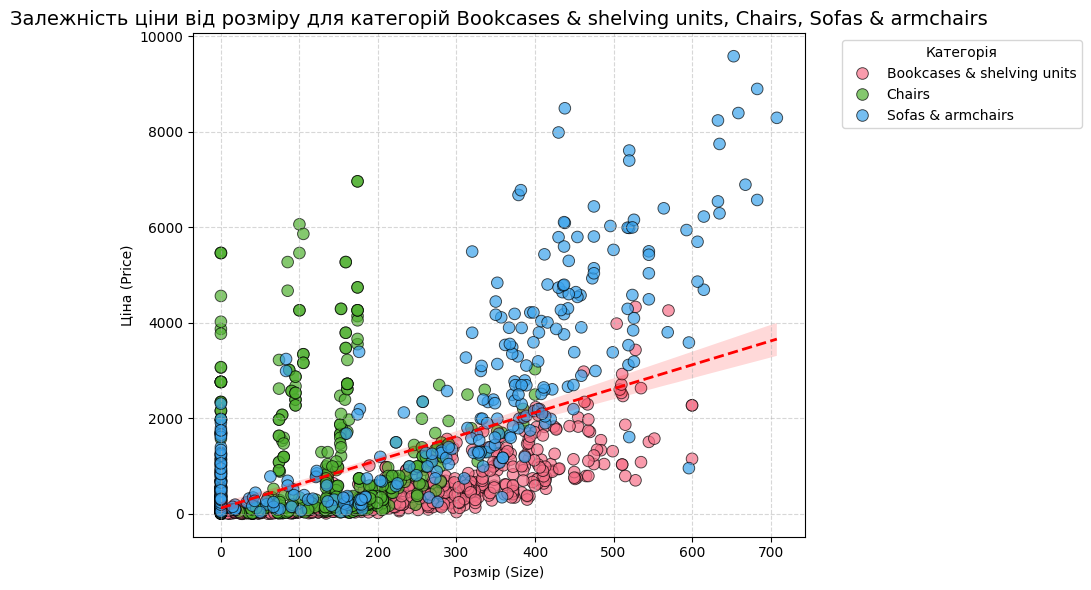

In [159]:
# –ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
top_categories = df['category'].value_counts().index[:3]
df_filtered = df[df['category'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price', hue='category', data=df_filtered, palette='husl', s=70, alpha=0.7, edgecolor='black')
sns.regplot(x='size', y='price', data=df_filtered, scatter=False, color='red', line_kws={"linewidth": 2, "linestyle": "--"})
plt.title(f"–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä—ñ–π {', '.join(top_categories)}", fontsize=14)
plt.xlabel('–†–æ–∑–º—ñ—Ä (Size)')
plt.ylabel('–¶—ñ–Ω–∞ (Price)')
plt.legend(title='–ö–∞—Ç–µ–≥–æ—Ä—ñ—è', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**–í–∏—Å–Ω–æ–≤–æ–∫**:
- –¶—ñ–Ω–∞ –≤ —Ü—ñ–ª–æ–º—É –∑—Ä–æ—Å—Ç–∞—î –∑ —Ä–æ–∑–º—ñ—Ä–æ–º, –∞–ª–µ –¥–ª—è —Ä—ñ–∑–Ω–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ü—è –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –≤–∞—Ä—ñ—é—î—Ç—å—Å—è.

- Sofas & armchairs –º–∞—é—Ç—å –Ω–∞–π–±—ñ–ª—å—à–∏–π —Ä–æ–∑–∫–∏–¥ —Ü—ñ–Ω —ñ –≤–∏—Å–æ–∫—É —Å–µ—Ä–µ–¥–Ω—é –≤–∞—Ä—Ç—ñ—Å—Ç—å.

- Chairs –º–∞—é—Ç—å —è–∫ –¥–µ—à–µ–≤—ñ, —Ç–∞–∫ —ñ –¥–æ—Ä–æ–≥—ñ –µ–∫–∑–µ–º–ø–ª—è—Ä–∏, –Ω–µ–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É.

- Bookcases & shelving units –º–∞—é—Ç—å –Ω–∏–∂—á—ñ —Ü—ñ–Ω–∏ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ —ñ–Ω—à–∏–º–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏.–º–æ–∂–µ–º–æ —Å—Ç–≤–µ—Ä–¥–∂—É–≤–∞—Ç–∏, —â–æ —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É.

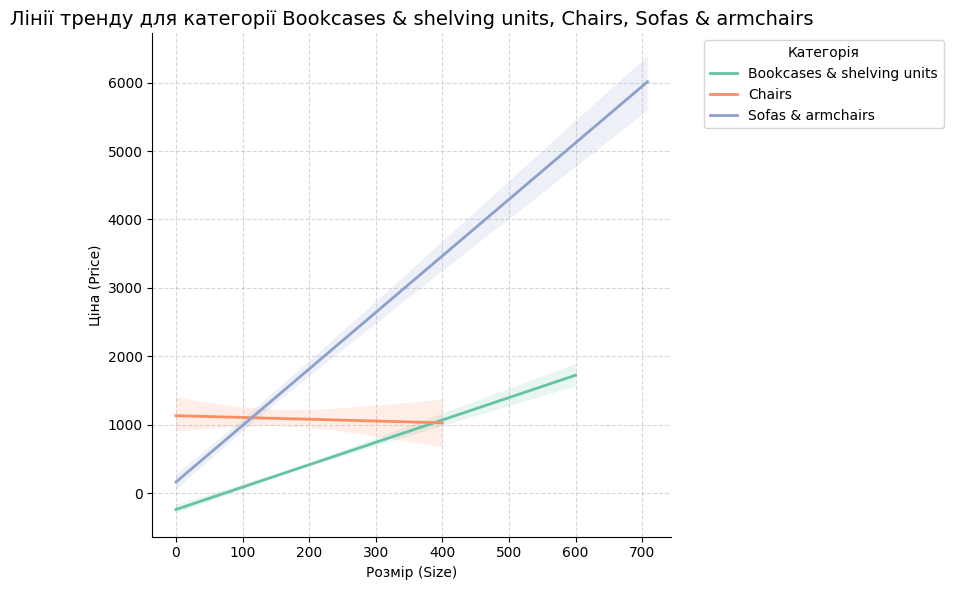

In [160]:
# –õ—ñ–Ω—ñ—ó —Ç—Ä–µ–Ω–¥—É –¥–ª—è –∫–æ–∂–Ω–æ—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó
sns.lmplot(x='size', y='price', hue='category', data=df_filtered, palette='Set2', height=6, aspect=1.5, scatter=False, line_kws={'linewidth': 2}, legend=False)
plt.title(f"–õ—ñ–Ω—ñ—ó —Ç—Ä–µ–Ω–¥—É –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó {', '.join(top_categories)}", fontsize=14)
plt.xlabel('–†–æ–∑–º—ñ—Ä (Size)')
plt.ylabel('–¶—ñ–Ω–∞ (Price)')
plt.grid(True, linestyle='--', alpha=0.5)

# –í–∏–Ω–æ—Å–∏–º–æ –ª–µ–≥–µ–Ω–¥—É –∑–∞ –º–µ–∂—ñ –≥—Ä–∞—Ñ—ñ–∫–∞
plt.legend(title='–ö–∞—Ç–µ–≥–æ—Ä—ñ—è', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()  # –©–æ–± —É–Ω–∏–∫–Ω—É—Ç–∏ –ø–µ—Ä–µ–∫—Ä–∏—Ç—Ç—è
plt.show()


**–í–∏—Å–Ω–æ–≤–æ–∫**: –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É –ø–æ–∫–∞–∑–∞–Ω–æ –ª—ñ–Ω—ñ–π–Ω–æ—é —Ä–µ–≥—Ä–µ—Å—ñ—î—é –∑ —Ç—Ä–µ–Ω–¥–æ–≤–∏–º–∏ –ª—ñ–Ω—ñ—è–º–∏. –ë–∞—á–∏–º–æ –≤ —è–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö –Ω–∞–π–±—ñ–ª—å—à–∞ –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É.


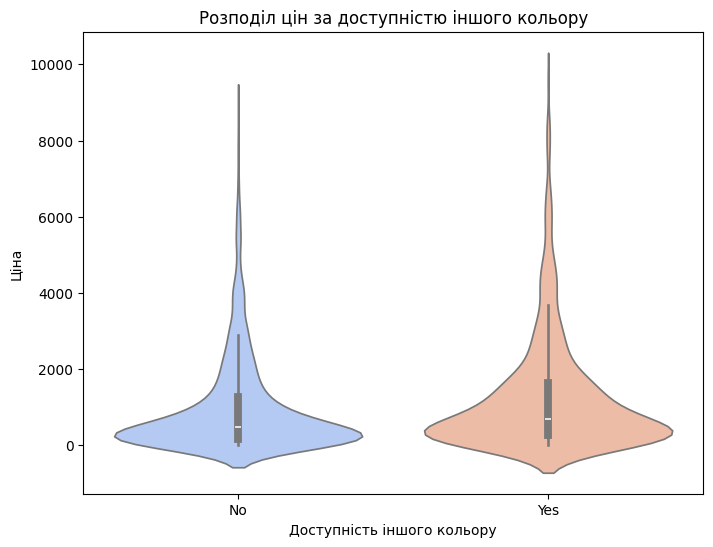

In [161]:
# –†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω –∑–∞ –¥–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—é —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É
plt.figure(figsize=(8, 6))
sns.violinplot(x='other_colors', y='price', hue='other_colors', data=df, palette='coolwarm', legend=False)
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω –∑–∞ –¥–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—é —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É')
plt.xlabel('–î–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—å —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É')
plt.ylabel('–¶—ñ–Ω–∞')
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫**: –¥–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—å —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É –º–æ–∂–µ –≤–ø–ª–∏–≤–∞—Ç–∏ –Ω–∞ —Ä–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω. –¢–æ–≤–∞—Ä–∏ –∑ –¥–æ—Å—Ç—É–ø–Ω–∏–º —ñ–Ω—à–∏–º –∫–æ–ª—å–æ—Ä–æ–º –º–æ–∂—É—Ç—å –º–∞—Ç–∏ –±—ñ–ª—å—à—É –≤–∞—Ä—ñ–∞—Ç–∏–≤–Ω—ñ—Å—Ç—å —É —Ü—ñ–Ω–∞—Ö.

In [162]:
#–°—Ç–≤–æ—Ä–∏–º–æ –Ω–æ–≤—É –∫–æ–ª–æ–Ω–∫—É –¥–ª—è –Ω–∞—è–≤–Ω–æ—Å—Ç—ñ –¥–æ–¥–∞—Ç–∫–æ–≤–∏—Ö –∫–æ–ª—å–æ—Ä—ñ–≤
df['other_colors_1'] = df['other_colors'].map(dict(Yes=1, No=0))
df = df.reset_index()
print(df.head().to_markdown())

|    |   index | name                  | category      |   price |   old_price | sellable_online   | other_colors   | short_description                               | designer             |   depth |   height |   width |   size | designer_clean       |   other_colors_1 |
|---:|--------:|:----------------------|:--------------|--------:|------------:|:------------------|:---------------|:------------------------------------------------|:---------------------|--------:|---------:|--------:|-------:|:---------------------|-----------------:|
|  0 |       0 | FREKVENS              | Bar furniture |     265 |           0 | True              | No             | Bar table, in/outdoor,          51x51 cm        | Nicholai Wiig Hansen |     nan |       99 |      51 |    150 | Nicholai Wiig Hansen |                0 |
|  1 |       1 | NORDVIKEN             | Bar furniture |     995 |           0 | False             | No             | Bar table,          140x80 cm                   | Francis Cayou

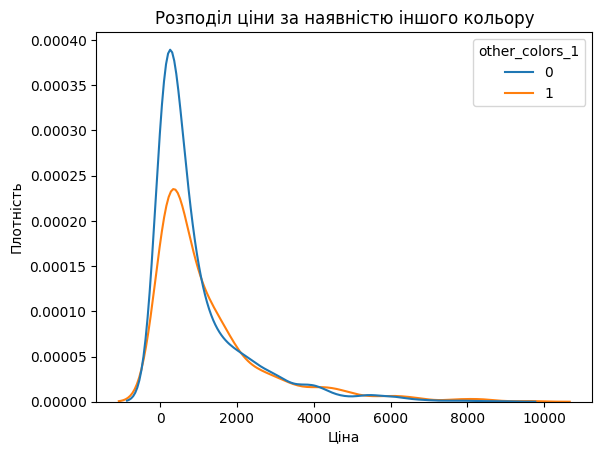

In [163]:
sns.kdeplot(data=df, x='price', hue='other_colors_1')
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω–∏ –∑–∞ –Ω–∞—è–≤–Ω—ñ—Å—Ç—é —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É')
plt.xlabel('–¶—ñ–Ω–∞')
plt.ylabel('–ü–ª–æ—Ç–Ω—ñ—Å—Ç—å')
plt.show()

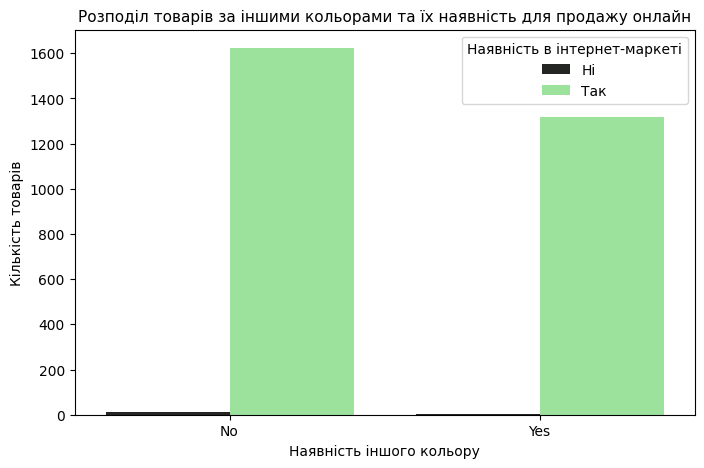

In [164]:
# –†–æ–∑–ø–æ–¥—ñ–ª —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —ñ–Ω—à–∏–º–∏ –∫–æ–ª—å–æ—Ä–∞–º–∏ —Ç–∞ —ó—Ö –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –¥–ª—è –ø—Ä–æ–¥–∞–∂—É –æ–Ω–ª–∞–π–Ω
plt.figure(figsize=(8, 5))
sns.countplot(x='other_colors', hue='sellable_online', data=df, palette='dark:lightgreen')
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —ñ–Ω—à–∏–º–∏ –∫–æ–ª—å–æ—Ä–∞–º–∏ —Ç–∞ —ó—Ö –Ω–∞—è–≤–Ω—ñ—Å—Ç—å –¥–ª—è –ø—Ä–æ–¥–∞–∂—É –æ–Ω–ª–∞–π–Ω', fontsize=11)
plt.xlabel('–ù–∞—è–≤–Ω—ñ—Å—Ç—å —ñ–Ω—à–æ–≥–æ –∫–æ–ª—å–æ—Ä—É')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤')
plt.legend(title='–ù–∞—è–≤–Ω—ñ—Å—Ç—å –≤ —ñ–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞—Ä–∫–µ—Ç—ñ', labels=['–ù—ñ', '–¢–∞–∫'],bbox_to_anchor=(1, 1))
plt.show()

In [165]:
# –ü—Ä–æ–¥–∞–∂—ñ –æ–Ω–ª–∞–π–Ω
df['sellable_online'].value_counts() #19 —Ç–æ–≤–∞—Ä—ñ–≤ –Ω–µ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –æ–Ω–ª–∞–π–Ω

sellable_online
True     2943
False      19
Name: count, dtype: int64

### Pairplot –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤

–ë—É–¥—É—î–º–æ pairplot –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤ –º—ñ–∂ –æ—Å–Ω–æ–≤–Ω–∏–º–∏ —á–∏—Å–ª–æ–≤–∏–º–∏ –æ–∑–Ω–∞–∫–∞–º–∏ (–∑–∞ –Ω—è–≤–Ω—ñ—Å—Ç—é —ñ–Ω—à–∏—Ö –∫–æ–ª—å–æ—Ä—ñ–≤).

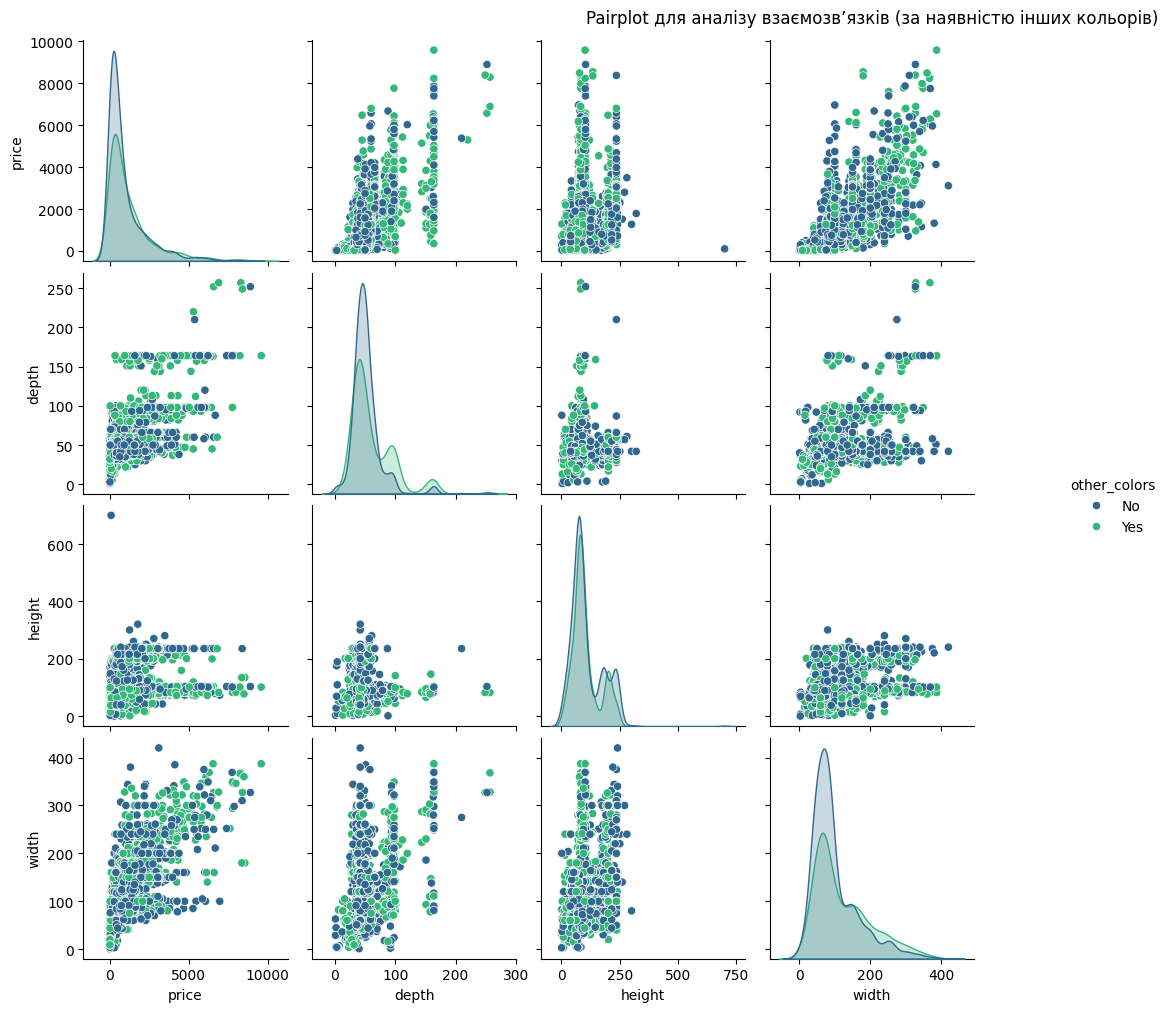

In [166]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors','category']], hue='other_colors', palette='viridis')
plt.title("Pairplot –¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –≤–∑–∞—î–º–æ–∑–≤‚Äô—è–∑–∫—ñ–≤ (–∑–∞ –Ω–∞—è–≤–Ω—ñ—Å—Ç—é —ñ–Ω—à–∏—Ö –∫–æ–ª—å–æ—Ä—ñ–≤)", y=4.2)
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** –Ω–∞ —Ü—ñ–Ω–æ—É—Ç–≤–æ—Ä–µ–Ω–Ω—è –º–æ–∂—É—Ç—å –≤–ø–ª–∏–≤–∞—Ç–∏ —à–∏—Ä–∏–Ω–∞,–≤–∏—Å–æ—Ç–∞,–≥–ª–∏–±–∏–Ω–∞

### –ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∞ –º–∞—Ç—Ä–∏—Ü—è

–ü–æ–±—É–¥–æ–≤–∞ —Ç–µ–ø–ª–æ–≤–æ—ó –∫–∞—Ä—Ç–∏ –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó –∫–æ—Ä–µ–ª—è—Ü—ñ–π –º—ñ–∂ —á–∏—Å–ª–æ–≤–∏–º–∏ –æ–∑–Ω–∞–∫–∞–º–∏.  –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ –ª–∏—à–µ —á–∏—Å–ª–æ–≤—ñ –∫–æ–ª–æ–Ω–∫–∏.

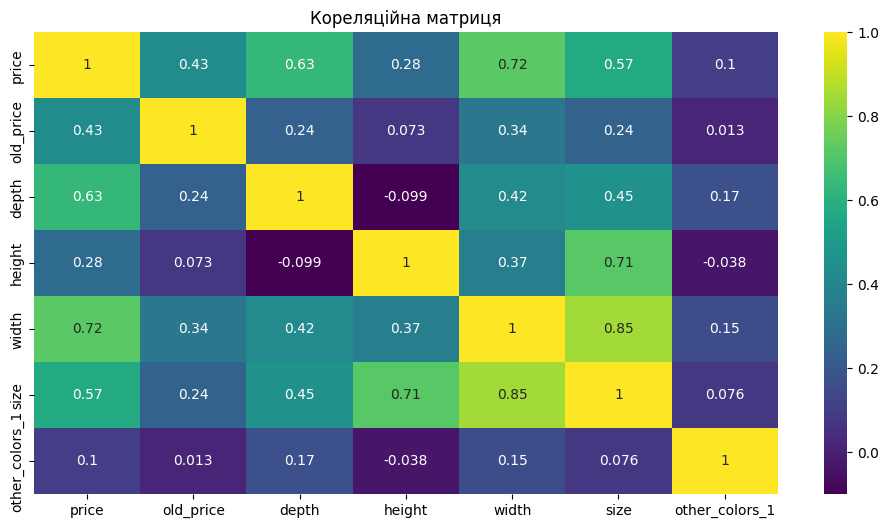

In [167]:
plt.figure(figsize=(12, 6))

numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['index'], errors='ignore')

sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis')

plt.title('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∞ –º–∞—Ç—Ä–∏—Ü—è')
plt.show()

**–í–∏—Å–Ω–æ–≤–æ–∫** : —Ç–µ–ø–ª–æ–≤–∞ –∫–∞—Ä—Ç–∞ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–∑–∞—î–º–æ–∑–≤'—è–∑–æ–∫ `price` i `width` , `depth` , `heigh` , `size`

### –ó—Ä–æ–±–∏–º–æ –ª–æ–≥–∞—Ä–∏—Ñ–º—É–≤–∞–Ω–Ω—è
(–¥–ª—è –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–∏—Ö –¥–æ –∞–Ω–∞–ª—ñ–∑—É, —â–æ–± –∑—Ä–æ–±–∏—Ç–∏ —ó—Ö –±—ñ–ª—å—à –Ω–æ—Ä–º–∞–ª—å–Ω–∏–º–∏, –ª—ñ–Ω—ñ–π–Ω–∏–º–∏ —Ç–∞ –∑–º–µ–Ω—à—É—î –≤–ø–ª–∏–≤ –≤–∏–∫–∏–¥—ñ–≤)

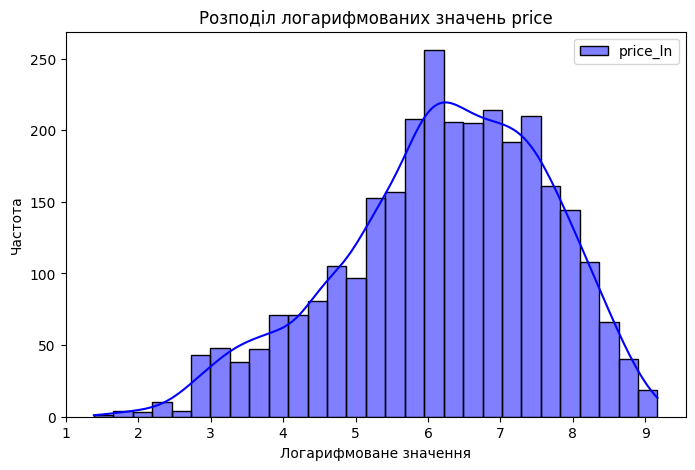

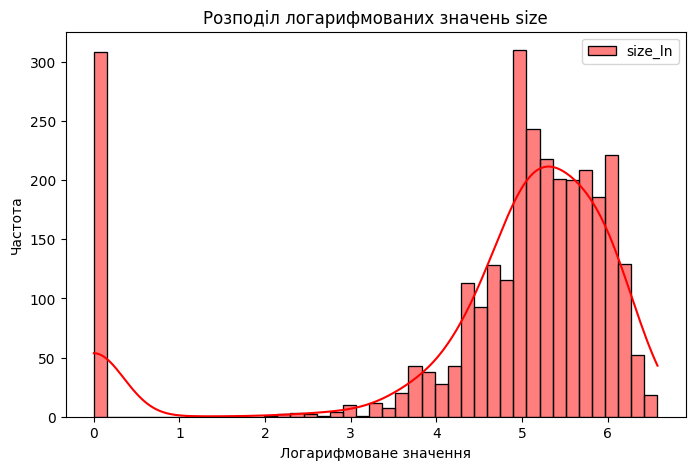

In [168]:
# –õ–æ–≥–∞—Ä–∏—Ñ–º—É–≤–∞–Ω–Ω—è —Ü—ñ–Ω–∏
df['price_ln'] = np.log(df['price'] + 1)
# –õ–æ–≥–∞—Ä–∏—Ñ–º—É–≤–∞–Ω–Ω—è —Ä–æ–∑–º—ñ—Ä—É
df['size_ln'] = np.log(df['size'] + 1)


plt.figure(figsize=(8, 5))
sns.histplot(df['price_ln'], kde=True, color="blue", alpha=0.5, label="price_ln")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å price")
plt.xlabel("–õ–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è")
plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['size_ln'], kde=True, color="red", alpha=0.5, label="size_ln")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å size")
plt.xlabel("–õ–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è")
plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞")
plt.legend()
plt.show()




**–í–∏—Å–Ω–æ–≤–æ–∫** –Ω–∞ –≥—Ä–∞—Ñ—ñ–∫—É –ø–æ–º—ñ—Ç–Ω–æ —â–æ –ª–æ–≥–∞—Ä–∏—Ñ–º—É–≤–∞–Ω–Ω—è —Ü—ñ–Ω–∏ –≤–∏—Ä—ñ–≤–Ω—è–ª–æ —Ä–æ–∑–ø–æ–¥—ñ–ª ‚Äì –∑–∞–º—ñ—Å—Ç—å –ø–æ—á–∞—Ç–∫–æ–≤–æ–≥–æ —Å–∏–ª—å–Ω–æ —Å–∫–æ—à–µ–Ω–æ–≥–æ —Ä–æ–∑–ø–æ–¥—ñ–ª—É (–∑ –¥–æ–≤–≥–∏–º –ø—Ä–∞–≤–∏–º —Ö–≤–æ—Å—Ç–æ–º) –º–∏ –æ—Ç—Ä–∏–º–∞–ª–∏ –±—ñ–ª—å—à —Å–∏–º–µ—Ç—Ä–∏—á–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª , –ª–æ–≥–∞—Ä–∏—Ñ–º—É–≤–∞–Ω–Ω—è —Ä–æ–∑–º—ñ—Ä—É —Ç–∞–∫–æ–∂.

#–†–æ–∑–≥–ª—è–Ω–∏–º–æ –≥—ñ–ø–æ—Ç–µ–∑–∏ –≤–ø–ª–∏–≤—É –Ω–∞ —Ü—ñ–Ω—É.

###–ì—ñ–ø–æ—Ç–µ–∑–∞ 1
-H‚ÇÄ: —Ü—ñ–Ω–∞ –Ω–µ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –∫–æ–ª—å–æ—Ä—É

-H‚ÇÅ: —Ü—ñ–Ω–∞ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –∫–æ–ª—å–æ—Ä—É



In [169]:
# –§—ñ–ª—å—Ç—Ä—É—î–º–æ —Ç–æ–≤–∞—Ä–∏ –∑ —Ä—ñ–∑–Ω–∏–º–∏ –∫–æ–ª—å–æ—Ä–∞–º–∏
colors_yes = df[df['other_colors'] == 'Yes']['price']
colors_no = df[df['other_colors'] == 'No']['price']

# –û–±—á–∏—Å–ª—é—î–º–æ —Å–µ—Ä–µ–¥–Ω—ñ —Ü—ñ–Ω–∏
mean_yes = colors_yes.mean()
mean_no = colors_no.mean()

print(f"–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤ –∑ —ñ–Ω—à–∏–º–∏ –∫–æ–ª—å–æ—Ä–∞–º–∏: {mean_yes:.2f}")
print(f"–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤ –±–µ–∑ —ñ–Ω—à–∏—Ö –∫–æ–ª—å–æ—Ä—ñ–≤: {mean_no:.2f}")

# –ü–µ—Ä–µ–≤—ñ—Ä—è—î–º–æ, —á–∏ —î —Ä—ñ–∑–Ω–∏—Ü—è –∑–Ω–∞—á—É—â–æ—é (t-—Ç–µ—Å—Ç)
t_stat, p_value = stats.ttest_ind(colors_yes, colors_no, equal_var=False)
print(f"T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {t_stat:.4f}, p-–∑–Ω–∞—á–µ–Ω–Ω—è: {p_value:.4f}")

# –í–∏–∫–æ–Ω—É—î–º–æ ANOVA —Ç–µ—Å—Ç
anova_stat, anova_p = stats.f_oneway(colors_yes, colors_no)
print(f"ANOVA F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {anova_stat:.4f}, p-–∑–Ω–∞—á–µ–Ω–Ω—è: {anova_p:.4f}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è
if p_value < 0.05:
    print("–†—ñ–∑–Ω–∏—Ü—è –≤ —Ü—ñ–Ω–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (t-—Ç–µ—Å—Ç).")
else:
    print("–ù–µ–º–∞—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—ó —Ä—ñ–∑–Ω–∏—Ü—ñ –≤ —Ü—ñ–Ω–∞—Ö (t-—Ç–µ—Å—Ç).")

if anova_p < 0.05:
    print("–†—ñ–∑–Ω–∏—Ü—è –≤ —Ü—ñ–Ω–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (ANOVA).")
else:
    print("–ù–µ–º–∞—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—ó —Ä—ñ–∑–Ω–∏—Ü—ñ –≤ —Ü—ñ–Ω–∞—Ö (ANOVA).")


–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤ –∑ —ñ–Ω—à–∏–º–∏ –∫–æ–ª—å–æ—Ä–∞–º–∏: 1265.85
–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤ –±–µ–∑ —ñ–Ω—à–∏—Ö –∫–æ–ª—å–æ—Ä—ñ–≤: 981.54
T-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 5.4472, p-–∑–Ω–∞—á–µ–Ω–Ω—è: 0.0000
ANOVA F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 30.7859, p-–∑–Ω–∞—á–µ–Ω–Ω—è: 0.0000
–†—ñ–∑–Ω–∏—Ü—è –≤ —Ü—ñ–Ω–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (t-—Ç–µ—Å—Ç).
–†—ñ–∑–Ω–∏—Ü—è –≤ —Ü—ñ–Ω–∞—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (ANOVA).


# –í–∏—Å–Ω–æ–≤–æ–∫:
–ê–Ω–∞–ª—ñ–∑ –ø–æ–∫–∞–∑–∞–≤, —â–æ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—ñ–≤, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—Ö —É –∫—ñ–ª—å–∫–æ—Ö –∫–æ–ª—å–æ—Ä–∞—Ö (1223.86), –∑–Ω–∞—á–Ω–æ –≤–∏—â–∞, –Ω—ñ–∂ —É —Ç–æ–≤–∞—Ä—ñ–≤ –±–µ–∑ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∏—Ö –∫–æ–ª—å–æ—Ä–æ–≤–∏—Ö –≤–∞—Ä—ñ–∞–Ω—Ç—ñ–≤ (829.90).

- –°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–∏–π —Ç–µ—Å—Ç (t-—Ç–µ—Å—Ç):
##### T = 6.7429 (–∑–Ω–∞—á–µ–Ω–Ω—è T (t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞) –ø–æ–∫–∞–∑—É—î, –Ω–∞—Å–∫—ñ–ª—å–∫–∏ –≤–µ–ª–∏–∫–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ —Å–µ—Ä–µ–¥–Ω—ñ–º–∏ —É –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑—ñ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ—é –ø–æ–º–∏–ª–∫–æ—é. –ß–∏–º –≤–∏—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è T, —Ç–∏–º –±—ñ–ª—å—à–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —ñ —Ç–∏–º –º–µ–Ω—à–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å, —â–æ —Ü—è —Ä—ñ–∑–Ω–∏—Ü—è –≤–∏–ø–∞–¥–∫–æ–≤–∞. –ó–Ω–∞—á–µ–Ω–Ω—è T = 6.7429 —î –¥–æ–≤–æ–ª—ñ –≤–µ–ª–∏–∫–∏–º, —â–æ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —Å—É—Ç—Ç—î–≤—É —Ä—ñ–∑–Ω–∏—Ü—é –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏)
#####—ñ p-–∑–Ω–∞—á–µ–Ω–Ω—è = 0.000, —â–æ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (p < 0.05).

- ANOVA —Ç–µ—Å—Ç:
##### –¥–∞–≤ –∑–Ω–∞—á–µ–Ω–Ω—è F = 45.7563 (F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ–∫–∞–∑—É—î —Å–ø—ñ–≤–≤—ñ–¥–Ω–æ—à–µ–Ω–Ω—è –º—ñ–∂ –º—ñ–∂–≥—Ä—É–ø–æ–≤–æ—é –¥–∏—Å–ø–µ—Ä—Å—ñ—î—é (–≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏) —ñ –≤–Ω—É—Ç—Ä—ñ—à–Ω—å–æ–≥—Ä—É–ø–æ–≤–æ—é –¥–∏—Å–ø–µ—Ä—Å—ñ—î—é (–≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –≤—Å–µ—Ä–µ–¥–∏–Ω—ñ –≥—Ä—É–ø). –ß–∏–º –≤–∏—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è F, —Ç–∏–º –±—ñ–ª—å—à—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –≤–∞—Ä—ñ–∞—Ü—ñ—î—é –≤—Å–µ—Ä–µ–¥–∏–Ω—ñ –∫–æ–∂–Ω–æ—ó –≥—Ä—É–ø–∏. F = 45.7563 ‚Äì –¥—É–∂–µ –≤–µ–ª–∏–∫–µ –∑–Ω–∞—á–µ–Ω–Ω—è, —â–æ –≤–∫–∞–∑—É—î –Ω–∞ —Å—É—Ç—Ç—î–≤—É —Ä—ñ–∑–Ω–∏—Ü—é –º—ñ–∂ —Å–µ—Ä–µ–¥–Ω—ñ–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏ –≥—Ä—É–ø.
##### p-–∑–Ω–∞—á–µ–Ω–Ω—è = 0.000, —â–æ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ (p < 0.05).

–¶–µ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î –≥—ñ–ø–æ—Ç–µ–∑—É –ø—Ä–æ —Ç–µ, —â–æ —Ç–æ–≤–∞—Ä–∏ –∑ —Ä—ñ–∑–Ω–∏–º–∏ –∫–æ–ª—å–æ—Ä–æ–≤–∏–º–∏ –≤–∞—Ä—ñ–∞–Ω—Ç–∞–º–∏ –≤ —Å–µ—Ä–µ–¥–Ω—å–æ–º—É –¥–æ—Ä–æ–∂—á—ñ.

###–ì—ñ–ø–æ—Ç–µ–∑–∞ 2
-H‚ÇÄ: —Ü—ñ–Ω–∞ –Ω–µ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É

-H‚ÇÅ: —Ü—ñ–Ω–∞ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É



In [170]:
# –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞
spearman_corr, spearman_p = stats.spearmanr(df['size_ln'], df['price_ln'])
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p:.5f}")

# –†–µ–≥—Ä–µ—Å—ñ—è –¥–ª—è –æ—Ü—ñ–Ω–∫–∏ –≤–ø–ª–∏–≤—É —Ä–æ–∑–º—ñ—Ä—É –Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º —Ü—ñ–Ω–∏
slope, intercept, r_value, p_value, std_err = stats.linregress(df['size_ln'], df['price_ln'])
print(f"Linear regression: Slope={slope:.4f}, Intercept={intercept:.4f}, R¬≤={r_value**2:.4f}, P-value={p_value:.5f}")

Spearman correlation: 0.5875, P-value: 0.00000
Linear regression: Slope=0.2822, Intercept=4.8913, R¬≤=0.1174, P-value=0.00000


- –ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞:
##### –†–µ–∑—É–ª—å—Ç–∞—Ç –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –°–ø—ñ—Ä–º–µ–Ω–∞ 0.5937 (–ö–æ—Ä–µ–ª—è—Ü—ñ—è –°–ø—ñ—Ä–º–µ–Ω–∞ (Spearman's rank correlation coefficient) ‚Äì —Ü–µ –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–Ω–∏–π –º–µ—Ç–æ–¥, —è–∫–∏–π –æ—Ü—ñ–Ω—é—î –º–æ–Ω–æ—Ç–æ–Ω–Ω–∏–π –∑–≤‚Äô—è–∑–æ–∫ –º—ñ–∂ –¥–≤–æ–º–∞ –∑–º—ñ–Ω–Ω–∏–º–∏. –í–æ–Ω–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î—Ç—å—Å—è, –∫–æ–ª–∏: –î–∞–Ω—ñ –º–æ–∂—É—Ç—å –±—É—Ç–∏ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–∏–º–∏ –∞–±–æ –º—ñ—Å—Ç–∏—Ç–∏ –≤–∏–∫–∏–¥–∏. –ó–≤‚Äô—è–∑–æ–∫ –º—ñ–∂ –∑–º—ñ–Ω–Ω–∏–º–∏ –Ω–µ –æ–±–æ–≤‚Äô—è–∑–∫–æ–≤–æ –ª—ñ–Ω—ñ–π–Ω–∏–π, –∞–ª–µ –º–æ–∂–µ –±—É—Ç–∏ –º–æ–Ω–æ—Ç–æ–Ω–Ω–∏–º (–∑–±—ñ–ª—å—à—É—î—Ç—å—Å—è –∞–±–æ –∑–º–µ–Ω—à—É—î—Ç—å—Å—è). –ó–Ω–∞—á–µ–Ω–Ω—è –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç–∞ –°–ø—ñ—Ä–º–µ–Ω–∞ (œÅ) –∑–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ –¥—ñ–∞–ø–∞–∑–æ–Ω—ñ –≤—ñ–¥ -1 –¥–æ 1: œÅ ‚âà 1 ‚Äì —Å–∏–ª—å–Ω–∞ –ø—Ä—è–º–∞ (–ø–æ–∑–∏—Ç–∏–≤–Ω–∞) –∫–æ—Ä–µ–ª—è—Ü—ñ—è; œÅ ‚âà -1 ‚Äì —Å–∏–ª—å–Ω–∞ –∑–≤–æ—Ä–æ—Ç–Ω–∞ (–Ω–µ–≥–∞—Ç–∏–≤–Ω–∞) –∫–æ—Ä–µ–ª—è—Ü—ñ—è; œÅ ‚âà 0 ‚Äì –≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –∫–æ—Ä–µ–ª—è—Ü—ñ—ó), —Ü–µ –æ–∑–Ω–∞—á–∞—î –ø–æ–º—ñ—Ä–Ω–æ —Å–∏–ª—å–Ω–∏–π –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π –∑–≤‚Äô—è–∑–æ–∫ –º—ñ–∂ –¥–≤–æ–º–∞ –∑–º—ñ–Ω–Ω–∏–º–∏. –≤–∫–∞–∑—É—î –Ω–∞ –ø–æ–º—ñ—Ä–Ω–æ —Å–∏–ª—å–Ω—É –ø–æ–∑–∏—Ç–∏–≤–Ω—É –∫–æ—Ä–µ–ª—è—Ü—ñ—é –º—ñ–∂ —Ä–æ–∑–º—ñ—Ä–æ–º —Ç–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–æ—é —Ü—ñ–Ω–æ—é.
##### P-–∑–Ω–∞—á–µ–Ω–Ω—è 0.00000 (–º–µ–Ω—à–µ 0.05), –º–∏ –≤—ñ–¥–∫–∏–¥–∞—î–º–æ –Ω—É–ª–µ–≤—É –≥—ñ–ø–æ—Ç–µ–∑—É (—â–æ —Ü—ñ–Ω–∞ –Ω–µ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É) —ñ –ø—Ä–∏–π–º–∞—î–º–æ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É –≥—ñ–ø–æ—Ç–µ–∑—É (—â–æ —Ü—ñ–Ω–∞ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É).


- –õ—ñ–Ω—ñ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è:

##### –ü–æ–∫–∞–∑–Ω–∏–∫ R2 =0.1207 (R¬≤ –ø–æ–∫–∞–∑—É—î, –Ω–∞—Å–∫—ñ–ª—å–∫–∏ –¥–æ–±—Ä–µ –º–æ–¥–µ–ª—å –ø–æ—è—Å–Ω—é—î –≤–∞—Ä—ñ–∞—Ü—ñ—é –∑–∞–ª–µ–∂–Ω–æ—ó –∑–º—ñ–Ω–Ω–æ—ó). –ó–Ω–∞—á–µ–Ω–Ω—è 0.1207 –æ–∑–Ω–∞—á–∞—î, —â–æ –ª–∏—à–µ 12.07% –≤–∞—Ä—ñ–∞—Ü—ñ—ó —É –∑–∞–ª–µ–∂–Ω—ñ–π –∑–º—ñ–Ω–Ω—ñ–π –ø–æ—è—Å–Ω—é—î—Ç—å—Å—è –Ω–µ–∑–∞–ª–µ–∂–Ω–æ—é –∑–º—ñ–Ω–Ω–æ—é. –¶–µ –Ω–∏–∑—å–∫–µ –∑–Ω–∞—á–µ–Ω–Ω—è, —â–æ –≤–∫–∞–∑—É—î –Ω–∞ —Å–ª–∞–±–∫—É –ø–æ—è—Å–Ω—é–≤–∞–ª—å–Ω—É –∑–¥–∞—Ç–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ô–º–æ–≤—ñ—Ä–Ω–æ, —î —ñ–Ω—à—ñ —Ñ–∞–∫—Ç–æ—Ä–∏, —è–∫—ñ –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ –∑–∞–ª–µ–∂–Ω—É –∑–º—ñ–Ω–Ω—É.
##### P-–∑–Ω–∞—á–µ–Ω–Ω—è 0.00000 –≤–∫–∞–∑—É—î –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω—É –∑–Ω–∞—á—É—â—ñ—Å—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ –ª—ñ–Ω—ñ–π–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ñ—ó.

–Ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω–∞ –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –º—ñ–∂ —Ä–æ–∑–º—ñ—Ä–æ–º —ñ —Ü—ñ–Ω–æ—é (–ª–æ–≥–∞—Ä–∏—Ñ–º–æ–≤–∞–Ω–∞ —Ü—ñ–Ω–∞).
–†–æ–∑–º—ñ—Ä —Ç–æ–≤–∞—Ä—É –≤–ø–ª–∏–≤–∞—î –Ω–∞ —Ü—ñ–Ω—É, —Ö–æ—á–∞ –º–æ–¥–µ–ª—å –ª—ñ–Ω—ñ–π–Ω–æ—ó —Ä–µ–≥—Ä–µ—Å—ñ—ó –ø–æ—è—Å–Ω—é—î –ª–∏—à–µ —á–∞—Å—Ç–∏–Ω—É –≤–∞—Ä—ñ–∞—Ü—ñ—ó —Ü—ñ–Ω (–ø—Ä–∏–±–ª–∏–∑–Ω–æ 12,07%). –¶–µ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ –Ω–∞—è–≤–Ω—ñ—Å—Ç—å —ñ–Ω—à–∏—Ö —Ñ–∞–∫—Ç–æ—Ä—ñ–≤, —è–∫—ñ —Ç–∞–∫–æ–∂ –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ —Ü—ñ–Ω—É.

### –ì—ñ–ø–æ—Ç–µ–∑–∞ 3

-H‚ÇÄ: —Ü—ñ–Ω–∞ –Ω–µ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –¥–æ–≤–∂–∏–Ω–∏ –Ω–∞–∑–≤–∏ —Ç–æ–≤–∞—Ä—É

-H‚ÇÅ: —Ü—ñ–Ω–∞ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –¥–æ–≤–∂–∏–Ω–∏ –Ω–∞–∑–≤–∏ —Ç–æ–≤–∞—Ä—É

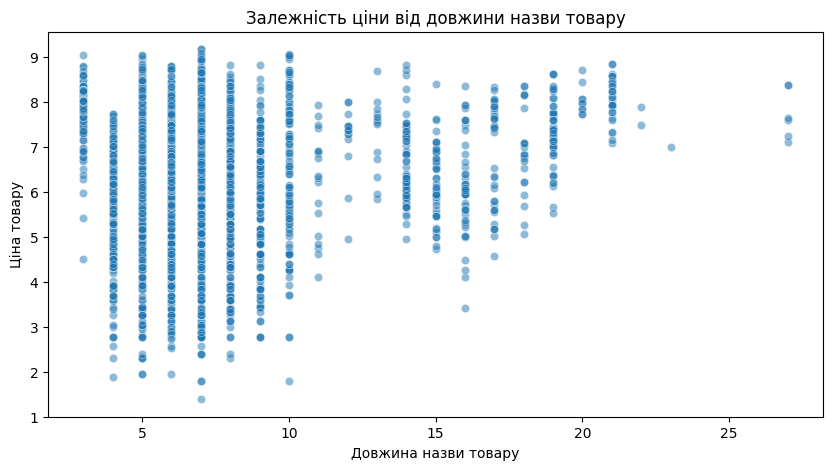

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü—ñ—Ä—Å–æ–Ω–∞: 0.1468
–†—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—é.

Bootstrap Test –¥–ª—è —Ü—ñ–Ω (price_ln):
P-value: 0.499
–†—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—é.


In [171]:
# –î–æ–¥–∞—î–º–æ –Ω–æ–≤—É –∫–æ–ª–æ–Ω–∫—É –∑ –¥–æ–≤–∂–∏–Ω–æ—é –Ω–∞–∑–≤–∏ —Ç–æ–≤–∞—Ä—É
df["title_length"] = df["name"].apply(lambda x: len(str(x)))

# –ì—Ä–∞—Ñ–∏–∫ –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ —Ü—ñ–Ω–∏ –≤—ñ–¥ –¥–æ–≤–∂–∏–Ω–∏ –Ω–∞–∑–≤–∏
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="title_length", y="price_ln", alpha=0.5)
plt.xlabel("–î–æ–≤–∂–∏–Ω–∞ –Ω–∞–∑–≤–∏ —Ç–æ–≤–∞—Ä—É")
plt.ylabel("–¶—ñ–Ω–∞ —Ç–æ–≤–∞—Ä—É")
plt.title("–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å —Ü—ñ–Ω–∏ –≤—ñ–¥ –¥–æ–≤–∂–∏–Ω–∏ –Ω–∞–∑–≤–∏ —Ç–æ–≤–∞—Ä—É")
plt.show()

# –ö–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –ü—ñ—Ä—Å–æ–Ω–∞
correlation = df["title_length"].corr(df["price_ln"])
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü—ñ—Ä—Å–æ–Ω–∞: {correlation:.4f}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è
if correlation  < 0.05:
    print("–Ü—Å–Ω—É—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏.")
else:
    print("–†—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—é.")


### Bootstrap Test
def bootstrap_test(x, y, n_bootstraps=10000):
    diffs = []
    for _ in range(n_bootstraps):
        x_samples = np.random.choice(x, size=len(x), replace=True)
        y_samples = np.random.choice(y, size=len(y), replace=True)
        diffs.append(np.abs(np.mean(x_samples) - np.mean(y_samples)))

    p_value = np.mean(np.array(diffs) >= np.abs(np.mean(x) - np.mean(y)))
    print(f"P-value: {p_value:.3f}")
    return p_value

# –†–æ–∑–¥—ñ–ª—è—î–º–æ –¥–∞–Ω—ñ –Ω–∞ –¥–≤—ñ –≥—Ä—É–ø–∏: –∫–æ—Ä–æ—Ç–∫—ñ –Ω–∞–∑–≤–∏ —Ç–∞ –¥–æ–≤–≥—ñ –Ω–∞–∑–≤–∏
median_title_length = df["title_length"].median()  # –ú–µ–¥—ñ–∞–Ω–Ω–∞ –¥–æ–≤–∂–∏–Ω–∞ –Ω–∞–∑–≤–∏
short_title_df = df[df["title_length"] <= median_title_length]
long_title_df = df[df["title_length"] > median_title_length]

# –í–∏–∫–æ–Ω—É—î–º–æ Bootstrap Test –¥–ª—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è —Ü—ñ–Ω –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏
print("\nBootstrap Test –¥–ª—è —Ü—ñ–Ω (price_ln):")
p_value = bootstrap_test(short_title_df["price_ln"], long_title_df["price_ln"])

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É Bootstrap Test
if p_value < 0.05:
    print("–Ü—Å–Ω—É—î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏.")
else:
    print("–†—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–æ—é.")

–ö–æ—Ä–µ–ª—è—Ü—ñ—è –ü—ñ—Ä—Å–æ–Ω–∞:
##### r = 0.1088 (—Ü–µ –ø–æ–∫–∞–∑–Ω–∏–∫ –ª—ñ–Ω—ñ–π–Ω–æ–≥–æ –∑–≤‚Äô—è–∑–∫—É –º—ñ–∂ –¥–≤–æ–º–∞ –∑–º—ñ–Ω–Ω–∏–º–∏. –í–æ–Ω–∞ –≤–∞—Ä—ñ—é—î—Ç—å—Å—è –≤—ñ–¥ -1 –¥–æ 1: r ‚âà 1 ‚Äì —Å–∏–ª—å–Ω–∏–π –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π –∑–≤‚Äô—è–∑–æ–∫ (–∑–Ω–∞—á–µ–Ω–Ω—è –æ–±–æ—Ö –∑–º—ñ–Ω–Ω–∏—Ö –∑–±—ñ–ª—å—à—É—é—Ç—å—Å—è —Ä–∞–∑–æ–º); r ‚âà -1 ‚Äì —Å–∏–ª—å–Ω–∏–π –Ω–µ–≥–∞—Ç–∏–≤–Ω–∏–π –∑–≤‚Äô—è–∑–æ–∫ (–æ–¥–Ω–∞ –∑–º—ñ–Ω–Ω–∞ –∑–±—ñ–ª—å—à—É—î—Ç—å—Å—è, –∞ —ñ–Ω—à–∞ –∑–º–µ–Ω—à—É—î—Ç—å—Å—è;r ‚âà 0 ‚Äì –∑–≤‚Äô—è–∑–æ–∫ –≤—ñ–¥—Å—É—Ç–Ω—ñ–π –∞–±–æ –¥—É–∂–µ —Å–ª–∞–±–∫–∏–π.)–ó–Ω–∞—á–µ–Ω–Ω—è 0.1088 –±–ª–∏–∑—å–∫–µ –¥–æ –Ω—É–ª—è, —â–æ –æ–∑–Ω–∞—á–∞—î –¥—É–∂–µ —Å–ª–∞–±–∫–∏–π –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π –∑–≤‚Äô—è–∑–æ–∫ –º—ñ–∂ –∑–º—ñ–Ω–Ω–∏–º–∏. –¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ –∑–º—ñ–Ω–∞ –æ–¥–Ω—ñ—î—ó –∑–º—ñ–Ω–Ω–æ—ó –º–∞–π–∂–µ –Ω–µ –≤–ø–ª–∏–≤–∞—î –Ω–∞ –∑–º—ñ–Ω—É —ñ–Ω—à–æ—ó.

##### –û—Å–∫—ñ–ª—å–∫–∏ p-value = 0.495 (–±—ñ–ª—å—à–µ 0.05), –º–∏ –Ω–µ –º–æ–∂–µ–º–æ —Å–∫–∞–∑–∞—Ç–∏, —â–æ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –∑–Ω–∞—á—É—â–∞. –¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ü—ñ–Ω–∏ (—É –ª–æ–≥–∞—Ä–∏—Ñ–º—ñ—á–Ω–æ–º—É –º–∞—Å—à—Ç–∞–±—ñ) —É –¥–≤–æ—Ö –≥—Ä—É–ø–∞—Ö –Ω–µ –º–∞—é—Ç—å —Å—É—Ç—Ç—î–≤–∏—Ö –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π.

### –ì—ñ–ø–æ—Ç–µ–∑–∞ 4

-H‚ÇÄ: —Ü—ñ–Ω–∞ –Ω–µ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –∑–∞–æ–∫—Ä—É–≥–ª–µ–Ω–Ω—è —Ü—ñ–Ω–∏

-H‚ÇÅ: —Ü—ñ–Ω–∞ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –∑–∞–æ–∫—Ä—É–≥–ª–µ–Ω–Ω—è —Ü—ñ–Ω–∏

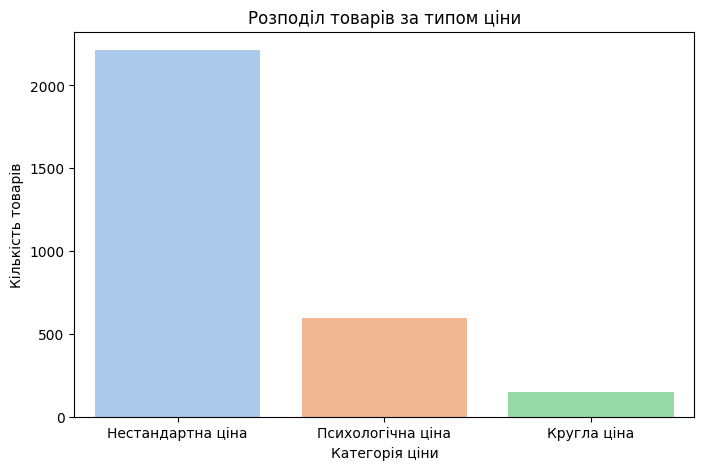

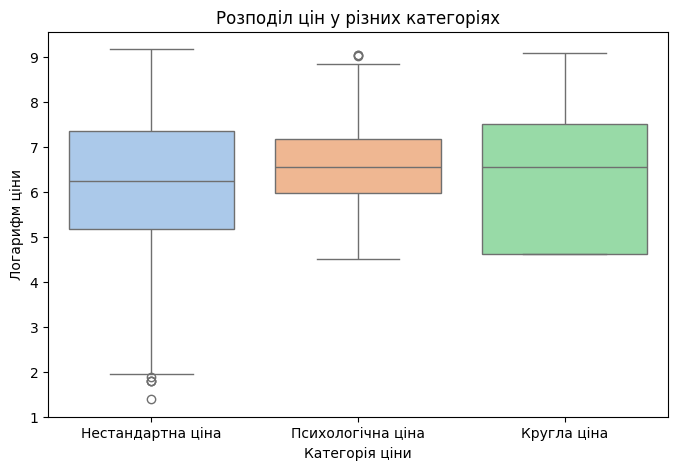

ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000
ANOVA: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ!
Kruskal-Wallis: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ!


In [172]:
# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó —Ü—ñ–Ω
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó —Ü—ñ–Ω
def categorize_price(price):
    price_str = str(round(price))
    if price_str.endswith(("99", "95", "90")):
        return "–ü—Å–∏—Ö–æ–ª–æ–≥—ñ—á–Ω–∞ —Ü—ñ–Ω–∞"
    elif price % 100 == 0:
        return "–ö—Ä—É–≥–ª–∞ —Ü—ñ–Ω–∞"
    else:
        return "–ù–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞ —Ü—ñ–Ω–∞"

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –Ω–æ–≤–æ—ó –∫–æ–ª–æ–Ω–∫–∏
df["price_category"] = df["price"].apply(categorize_price)

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ä–æ–∑–ø–æ–¥—ñ–ª—É —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —Ç–∏–ø–æ–º —Ü—ñ–Ω–∏
plt.figure(figsize=(8, 5))
sns.countplot(x=df["price_category"], hue="price_category", data=df, palette="pastel", legend=False)
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ü—ñ–Ω–∏")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —Ç–∏–ø–æ–º —Ü—ñ–Ω–∏")
plt.show()

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è —Ä–æ–∑–ø–æ–¥—ñ–ª—É —Ü—ñ–Ω —É –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="price_category", y="price_ln", data=df, hue="price_category", palette="pastel", legend=False)
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ü—ñ–Ω–∏")
plt.ylabel("–õ–æ–≥–∞—Ä–∏—Ñ–º —Ü—ñ–Ω–∏")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª —Ü—ñ–Ω —É —Ä—ñ–∑–Ω–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö")
plt.show()

# –ì—Ä—É–ø—É—î–º–æ –¥–∞–Ω—ñ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö –¥–ª—è —Ç–µ—Å—Ç—ñ–≤
groups = [df[df["price_category"] == cat]["price_ln"].dropna() for cat in df["price_category"].unique()]

# ANOVA —Ç–µ—Å—Ç
stat_anova, p_anova = f_oneway(*groups)
print(f"ANOVA p-value: {p_anova:.4f}")

# Kruskal-Wallis —Ç–µ—Å—Ç (—è–∫—â–æ –¥–∞–Ω—ñ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω—ñ)
stat_kruskal, p_kruskal = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p_kruskal:.4f}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
if p_anova < 0.05:
    print("ANOVA: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ!")
else:
    print("ANOVA: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ–∑–Ω–∞—á–Ω—ñ.")

if p_kruskal < 0.05:
    print("Kruskal-Wallis: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ!")
else:
    print("Kruskal-Wallis: –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ –Ω–µ–∑–Ω–∞—á–Ω—ñ.")

- ANOVA: p-value = 0.0000, —â–æ —î –∑–Ω–∞—á–Ω–æ –º–µ–Ω—à–∏–º –∑–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∏–π —Ä—ñ–≤–µ–Ω—å –∑–Ω–∞—á—É—â–æ—Å—Ç—ñ 0.05. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —ñ—Å–Ω—É—é—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ. –¢–∞–∫–∏–º —á–∏–Ω–æ–º, –º–∏ –º–æ–∂–µ–º–æ –≤—ñ–¥—Ö–∏–ª–∏—Ç–∏ –Ω—É–ª—å–æ–≤—É –≥—ñ–ø–æ—Ç–µ–∑—É, —â–æ —Å—Ç–≤–µ—Ä–¥–∂—É—î –ø—Ä–æ –≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏.

- Kruskal-Wallis: p-value = 0.0000, —â–æ —Ç–∞–∫–æ–∂ —î –∑–Ω–∞—á–Ω–æ –º–µ–Ω—à–∏–º –∑–∞ —Ä—ñ–≤–µ–Ω—å –∑–Ω–∞—á—É—â–æ—Å—Ç—ñ 0.05. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏–º–∏, –Ω–∞–≤—ñ—Ç—å —è–∫—â–æ –¥–∞–Ω—ñ –Ω–µ —Ä–æ–∑–ø–æ–¥—ñ–ª—è—é—Ç—å—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –æ—Å–∫—ñ–ª—å–∫–∏ —Ç–µ—Å—Ç –ö—Ä—É—Å–∫–∞–ª–∞-–í–∞–ª—ñ—Å–∞ —î –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–Ω–∏–º.

–û—Ç–∂–µ, –æ–±–∏–¥–≤–∞ —Ç–µ—Å—Ç–∏ (ANOVA —Ç–∞ Kruskal-Wallis) –≤–∫–∞–∑—É—é—Ç—å –Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –º—ñ–∂ –≥—Ä—É–ø–∞–º–∏.

# –ú–∞—à–∏–Ω–µ –Ω–∞–≤—á–∞–Ω–Ω—è


###–ó–∞–ø–æ–≤–Ω–µ–º–æ –ø—É—Å—Ç—ñ –∑–Ω–∞—á–µ–Ω–Ω—è (—Ñ–∞–∫—Ç–æ—Ä–∏ –≥–∞–±–∞—Ä–∏—Ç—ñ–≤ –∑–≥—Ä—É–ø—É—î–º–æ –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—î—é —Ç–∞ –∑–∞–ø–æ–≤–Ω–∏–º–æ –≤—ñ–¥—Å—É—Ç–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –º–µ–¥—ñ–∞–Ω–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏)

In [173]:
# –ó–∞–ø–æ–≤–Ω—é—î–º–æ –ø—Ä–æ–ø—É—Å–∫–∏ –¥–ª—è 'depth', 'height' —Ç–∞ 'width' –∑–∞ –º–µ–¥—ñ–∞–Ω–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö
median_d = df.groupby(['category'])['depth'].median()
median_h = df.groupby(['category'])['height'].median()
median_w = df.groupby(['category'])['width'].median()

median_price = df.groupby(['category'])['price'].median()
median_dsgn =  df.groupby(['designer_clean'])['price'].median()

df = df.set_index(['category'])
df['depth_1'] = df['depth'].fillna(median_d)
df['height_1'] = df['height'].fillna(median_h)
df['width_1'] = df['width'].fillna(median_w)
df['category_median_price'] = median_price

df = df.reset_index()

df = df.set_index(['designer_clean'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()
print(df.head().to_markdown())

|    | designer_clean       | category      |   index | name                  |   price |   old_price | sellable_online   | other_colors   | short_description                               | designer             |   depth |   height |   width |   size |   other_colors_1 |   price_ln |   size_ln |   title_length | price_category    |   depth_1 |   height_1 |   width_1 |   category_median_price |   designer_median_price |
|---:|:---------------------|:--------------|--------:|:----------------------|--------:|------------:|:------------------|:---------------|:------------------------------------------------|:---------------------|--------:|---------:|--------:|-------:|-----------------:|-----------:|----------:|---------------:|:------------------|----------:|-----------:|----------:|------------------------:|------------------------:|
|  0 | Nicholai Wiig Hansen | Bar furniture |       0 | FREKVENS              |     265 |           0 | True              | No             | Bar table, 

In [174]:
print(df.isnull().sum())

designer_clean              0
category                    0
index                       0
name                        0
price                       0
old_price                   0
sellable_online             0
other_colors                0
short_description           0
designer                    0
depth                    1118
height                    726
width                     442
size                        0
other_colors_1              0
price_ln                    0
size_ln                     0
title_length                0
price_category              0
depth_1                     0
height_1                    0
width_1                     0
category_median_price       0
designer_median_price       0
dtype: int64


## –ü—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è —Ü—ñ–Ω–∏

**–í—Ö—ñ–¥–Ω—ñ –æ–∑–Ω–∞–∫–∏:** `category`, `other_colors`, `designer_count`, `depth`, `height`, `width`
       
**–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞:** `price`

–ë—É–¥—É—Ç—å –∑–∞—Å—Ç–æ—Å–æ–≤–∞–Ω—ñ –Ω–∞—Å—Ç—É–ø–Ω—ñ –º–æ–¥–µ–ª—ñ:

- **KNeighborsRegressor (KNN Regressor)**(–¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –Ω–æ–≤–æ–≥–æ —Å–ø–æ—Å—Ç–µ—Ä–µ–∂–µ–Ω–Ω—è –º–æ–¥–µ–ª—å —à—É–∫–∞—î –Ω–∞–π–±–ª–∏–∂—á—ñ —Ç–æ—á–∫–∏ (—Å—É—Å—ñ–¥–∏) –∑ –Ω–∞–≤—á–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É —ñ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î —ó—Ö –∑–Ω–∞—á–µ–Ω–Ω—è –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è)
- **DecisionTreeRegressor** (–∞–ª–≥–æ—Ä–∏—Ç–º –±—É–¥—É—î –¥–µ—Ä–µ–≤–æ —Ä—ñ—à–µ–Ω—å, –¥–µ –∫–æ–∂–µ–Ω –≤—É–∑–æ–ª –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—î –æ–∑–Ω–∞–∫—É, –∞ –≥—ñ–ª–∫–∏ ‚Äî –º–æ–∂–ª–∏–≤—ñ –≤–∞—Ä—ñ–∞–Ω—Ç–∏ –¥–ª—è —Ü—ñ—î—ó –æ–∑–Ω–∞–∫–∏. –†—ñ—à–µ–Ω–Ω—è –ø—Ä–∏–π–º–∞—î—Ç—å—Å—è –Ω–∞ –æ—Å–Ω–æ–≤—ñ –Ω–∞–π–∫—Ä–∞—â–æ–≥–æ —Ä–æ–∑–±–∏—Ç—Ç—è –¥–∞–Ω–∏—Ö.)
-**Gradient Boosting Regressor** (–∫–æ–∂–µ–Ω –Ω–æ–≤–∏–π –¥–µ—Ä–µ–≤–æ–ø–æ–¥—ñ–±–Ω–∏–π –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –∞–±–æ —Ä–µ–≥—Ä–µ—Å–æ—Ä –Ω–∞–≤—á–∞—î—Ç—å—Å—è –Ω–∞ –ø–æ–º–∏–ª–∫–∞—Ö –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –¥–µ—Ä–µ–≤–∞. –ú–æ–¥–µ–ª—ñ –¥–æ–¥–∞—é—Ç—å—Å—è –ø–æ—Å—Ç—É–ø–æ–≤–æ, —ñ –∫–æ–∂–Ω–∞ –Ω–æ–≤–∞ –º–æ–¥–µ–ª—å –≤–∏–ø—Ä–∞–≤–ª—è—î –ø–æ–º–∏–ª–∫–∏ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö.)
- **RandomForestRegressor**(–°—Ç–≤–æ—Ä–µ–Ω–Ω—è –±–∞–≥–∞—Ç—å–æ—Ö –¥–µ—Ä–µ–≤ —Ä—ñ—à–µ–Ω—å –Ω–∞ –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö –ø—ñ–¥–º–Ω–æ–∂–∏–Ω–∞—Ö –¥–∞–Ω–∏—Ö —ñ –∫–æ–º–±—ñ–Ω—É–≤–∞–Ω–Ω—è —ó—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ –¥–ª—è –æ—Ç—Ä–∏–º–∞–Ω–Ω—è —Ç–æ—á–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑—É.)
- **LassoCV**( –º–æ–¥–µ–ª—å, —â–æ —î –≤–∞—Ä—ñ–∞–Ω—Ç–æ–º Lasso Regression (Least Absolute Shrinkage and Selection Operator), —è–∫–∞ –∑–∞—Å—Ç–æ—Å–æ–≤—É—î –º–µ—Ç–æ–¥ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—ó L1 –¥–ª—è –∑–º–µ–Ω—à–µ–Ω–Ω—è –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤ —Ä–µ–≥—Ä–µ—Å—ñ—ó —Ç–∞ –≤–∏–±–æ—Ä—É –≤–∞–∂–ª–∏–≤–∏—Ö –æ–∑–Ω–∞–∫. LassoCV –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –¥–ª—è –≤–∏–±–æ—Ä—É –Ω–∞–π–∫—Ä–∞—â–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—ó (Œ±), —â–æ –æ–ø—Ç–∏–º—ñ–∑—É—î –º–æ–¥–µ–ª—å.)
- **RidgeCV**(–≤–∞—Ä—ñ–∞–Ω—Ç Ridge Regression (—Ä–µ–≥—Ä–µ—Å—ñ—è –∑ L2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—î—é), —è–∫–∏–π –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω–æ–≥–æ –≤–∏–±–æ—Ä—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—ó Œ±.)
-**SVR** (Support Vector Regression (–†–µ–≥—Ä–µ—Å—ñ—è –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é –æ–ø–æ—Ä–Ω–∏—Ö –≤–µ–∫—Ç–æ—Ä—ñ–≤)
SVR —î –º–µ—Ç–æ–¥–æ–º —Ä–µ–≥—Ä–µ—Å—ñ—ó, —è–∫–∏–π –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î –∫–æ–Ω—Ü–µ–ø—Ü—ñ—é –æ–ø–æ—Ä–Ω–∏—Ö –≤–µ–∫—Ç–æ—Ä—ñ–≤ –∑ Support Vector Machine (SVM) –¥–ª—è –ø–æ–±—É–¥–æ–≤–∏ –º–æ–¥–µ–ª–µ–π, —â–æ –º–æ–∂—É—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞—Ç–∏ –±–µ–∑ –ª—ñ–Ω—ñ–π–Ω–∏—Ö –æ–±–º–µ–∂–µ–Ω—å. SVR –∑–∞—Å—Ç–æ—Å–æ–≤—É—î—Ç—å—Å—è, –∫–æ–ª–∏ –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ –ø–æ–±—É–¥—É–≤–∞—Ç–∏ —Ä–µ–≥—Ä–µ—Å—ñ–π–Ω—É –º–æ–¥–µ–ª—å –¥–ª—è –¥–∞–Ω–∏—Ö, —â–æ –º–æ–∂—É—Ç—å –±—É—Ç–∏ –Ω–µ–ª—ñ–Ω—ñ–π–Ω–∏–º–∏ –∞–±–æ –º—ñ—Å—Ç–∏—Ç–∏ —Å–∫–ª–∞–¥–Ω—ñ –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –º—ñ–∂ –æ–∑–Ω–∞–∫–∞–º–∏.)


–î–ª—è –∫–æ–∂–Ω–æ—ó –º–æ–¥–µ–ª—ñ –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—è (–º–µ—Ç—Ä–∏–∫–∞ R¬≤, MAE, RMSE) —Ç–∞ –ø—ñ–¥–±—ñ—Ä –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é GridSearchCV.


In [175]:
#—Å—Ç–≤–æ—Ä–∏–º–æ —Ñ—É–Ω–∫—Ü—ñ—é, –¥–ª—è —Ç–µ—Å—Ç—É–≤–∞–Ω–Ω—è —Ä–µ–≥—Ä–µ—Å—ñ–π–Ω–∏—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤—ñ –º–µ—Ç—Ä–∏–∫ ( R¬≤, MAE, RMSE).

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

    models = [
        ('LinearRegression', sk.linear_model.LinearRegression()),
        ('LassoCV', sk.linear_model.LassoCV()),
        ('RidgeCV', sk.linear_model.RidgeCV()),
        ('SVR', sk.svm.SVR(kernel='linear')),
        ('KNeighborsRegressor', sk.neighbors.KNeighborsRegressor(n_neighbors=16)),
        ('DecisionTreeRegressor', sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42)),
        ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
        ('GradientBoostingRegressor', GradientBoostingRegressor())
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model_name, model in models:  # –†–æ–∑–ø–∞–∫–æ–≤—É—î–º–æ –∫–æ—Ä—Ç–µ–∂ —É model_name —Ç–∞ model
        model.fit(X_train, Y_train)  # –¢–µ–ø–µ—Ä –ø—Ä–∞—Ü—é—î–º–æ –±–µ–∑ –ø–æ–º–∏–ª–æ–∫
        tmp['Model'] = model_name
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res


    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [176]:
X1 = df[['depth_1', 'width_1', 'height_1', 'category_median_price', 'designer_median_price', 'other_colors_1']]
Y1 = df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

R^2        MAE       RMSE
Model                                                   
RandomForestRegressor      0.81429  346.71953  591.42637
GradientBoostingRegressor  0.78445  398.70825  637.16866
DecisionTreeRegressor      0.73404  422.64848  707.76814
KNeighborsRegressor        0.67845  477.50886  778.22677
SVR                        0.66697  503.84661  792.00331
LinearRegression           0.65885  541.31204  801.59311
RidgeCV                    0.65878  541.30596  801.67756
LassoCV                    0.65791  536.77654  802.69934

R^2 ‚Äî –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç –¥–µ—Ç–µ—Ä–º—ñ–Ω–∞—Ü—ñ—ó (—á–∏–º –±–ª–∏–∂—á–µ –¥–æ 1, —Ç–∏–º –∫—Ä–∞—â–µ).

MAE (Mean Absolute Error) ‚Äî —Å–µ—Ä–µ–¥–Ω—è –∞–±—Å–æ–ª—é—Ç–Ω–∞ –ø–æ—Ö–∏–±–∫–∞.

RMSE (Root Mean Squared Error) ‚Äî –∫–æ—Ä—ñ–Ω—å —Å–µ—Ä–µ–¥–Ω—å–æ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ—ó –ø–æ—Ö–∏–±–∫–∏.

**–í–∏—Å–Ω–æ–≤–æ–∫** –º–æ–¥–µ–ª—å RandomForestRegressor –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–π–∫—Ä–∞—â–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–µ—Ä–µ–¥ —ñ–Ω—à–∏—Ö

###–ó–∞—Å—Ç–æ—Å—É—î–º–æ GridSearchCV –¥–ª—è –º–æ–¥–µ–ª–µ–π —Ç–∞ –Ω–∞–ª–∞—à—Ç—É—î–º–æ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏

In [137]:
# –†–æ–∑–±–∏—Ç—Ç—è –¥–∞–Ω–∏—Ö –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ —Ç–∞ —Ç–µ—Å—Ç–æ–≤—ñ –Ω–∞–±–æ—Ä–∏
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)

# –°–ø–∏—Å–æ–∫ –º–æ–¥–µ–ª–µ–π —Ç–∞ —ó—Ö–Ω—ñ—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
param_grid = {
    'LinearRegression': {},  # –£ LinearRegression –Ω–µ–º–∞—î –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è GridSearchCV
     'LassoCV': {'alphas': [[0.001, 0.01, 0.1, 1, 10, 100]]},
    'RidgeCV': {'alphas': [0.01, 0.1, 1, 10, 100]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
    'KNeighborsRegressor': {'n_neighbors': [5, 10, 15, 20]},
    'DecisionTreeRegressor': {'max_depth': [5, 10, 20, None]},
    'RandomForestRegressor': {'n_estimators': [10, 50, 100], 'max_depth': [10, 50]},
    'GradientBoostingRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

models = {
    'LinearRegression': LinearRegression(),
    'LassoCV': LassoCV(),
    'RidgeCV': RidgeCV(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    grid = GridSearchCV(model, param_grid.get(name, {}), cv=5, n_jobs=-1, verbose=0)
    grid.fit(X_train, Y_train)
    best_model = grid.best_estimator_

    # –û—Ü—ñ–Ω–∫–∞ –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ
    r2 = sk.metrics.r2_score(Y_test, best_model.predict(X_test))
    mae = sk.metrics.mean_absolute_error(Y_test, best_model.predict(X_test))
    rmse = np.sqrt(sk.metrics.mean_squared_error(Y_test, best_model.predict(X_test)))
    best_score = grid.best_score_

    results.append([name, grid.best_params_, r2, mae, rmse, best_score])

# –§–æ—Ä–º—É—î–º–æ DataFrame –∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'R^2', 'MAE', 'RMSE', 'Best Score'])
results_df = results_df.round(5)
results_df.sort_values(by='R^2', ascending=False, inplace=True)

print(results_df.to_markdown())

|    | Model                     | Best Params                                 |     R^2 |     MAE |    RMSE |   Best Score |
|---:|:--------------------------|:--------------------------------------------|--------:|--------:|--------:|-------------:|
|  6 | RandomForestRegressor     | {'max_depth': 50, 'n_estimators': 100}      | 0.81429 | 346.72  | 591.426 |      0.81406 |
|  7 | GradientBoostingRegressor | {'learning_rate': 0.2, 'n_estimators': 200} | 0.80855 | 362.391 | 600.497 |      0.81347 |
|  4 | KNeighborsRegressor       | {'n_neighbors': 5}                          | 0.74162 | 418.305 | 697.605 |      0.72537 |
|  5 | DecisionTreeRegressor     | {'max_depth': 10}                           | 0.73374 | 419.427 | 708.173 |      0.72089 |
|  3 | SVR                       | {'C': 10, 'epsilon': 1, 'kernel': 'linear'} | 0.66748 | 503.35  | 791.392 |      0.60213 |
|  0 | LinearRegression          | {}                                          | 0.65885 | 541.312 | 801.593 |      0.

**–í–∏—Å–Ω–æ–≤–æ–∫ —â–æ–¥–æ –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –º–æ–¥–µ–ª–µ–π**

–ù–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å ‚Üí RandomForestRegressor

- –ù–∞–π–≤–∏—â–∏–π –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç –¥–µ—Ç–µ—Ä–º—ñ–Ω–∞—Ü—ñ—ó
ùëÖ
2
=0.81429
, —â–æ –æ–∑–Ω–∞—á–∞—î, —â–æ –º–æ–¥–µ–ª—å –ø–æ—è—Å–Ω—é—î 81% –≤–∞—Ä—ñ–∞—Ü—ñ—ó —É –¥–∞–Ω–∏—Ö.
–ù–∞–π–º–µ–Ω—à—ñ –ø–æ–º–∏–ª–∫–∏: MAE = 346.72, RMSE =591.426.
–ù–∞–π–∫—Ä–∞—â–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è –≥–ª–∏–±–∏–Ω–∏ –¥–µ—Ä–µ–≤–∞ (max_depth) - 50 —Ç–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–µ—Ä–µ–≤ - 100. Best Score : 0.81406

- GradientBoostingRegressor —Ç–∞–∫–æ–∂ –ø–æ–∫–∞–∑—É—î —Ö–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç (
ùëÖ
2
=0.80855
), –∞–ª–µ –º–∞—î —Ç—Ä–æ—Ö–∏ –≤–∏—â—ñ –ø–æ–º–∏–ª–∫–∏ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ RandomForest.

- Support Vector Regression (SVR) –º–∞—î –ø–æ–∫–∞–∑–Ω–∏–∫
ùëÖ
2
=0.66

- –õ—ñ–Ω—ñ–π–Ω—ñ –º–æ–¥–µ–ª—ñ (RidgeCV, LassoCV, LinearRegression) –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å –∑–Ω–∞—á–Ω–æ –≥—ñ—Ä—à—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ (
ùëÖ
2
‚âà0.65
), —â–æ –≤–∫–∞–∑—É—î –Ω–∞ —ó—Ö–Ω—é –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—é —Å–∫–ª–∞–¥–Ω—ñ—Å—Ç—å –¥–ª—è –æ–ø–∏—Å—É –¥–∞–Ω–∏—Ö.  

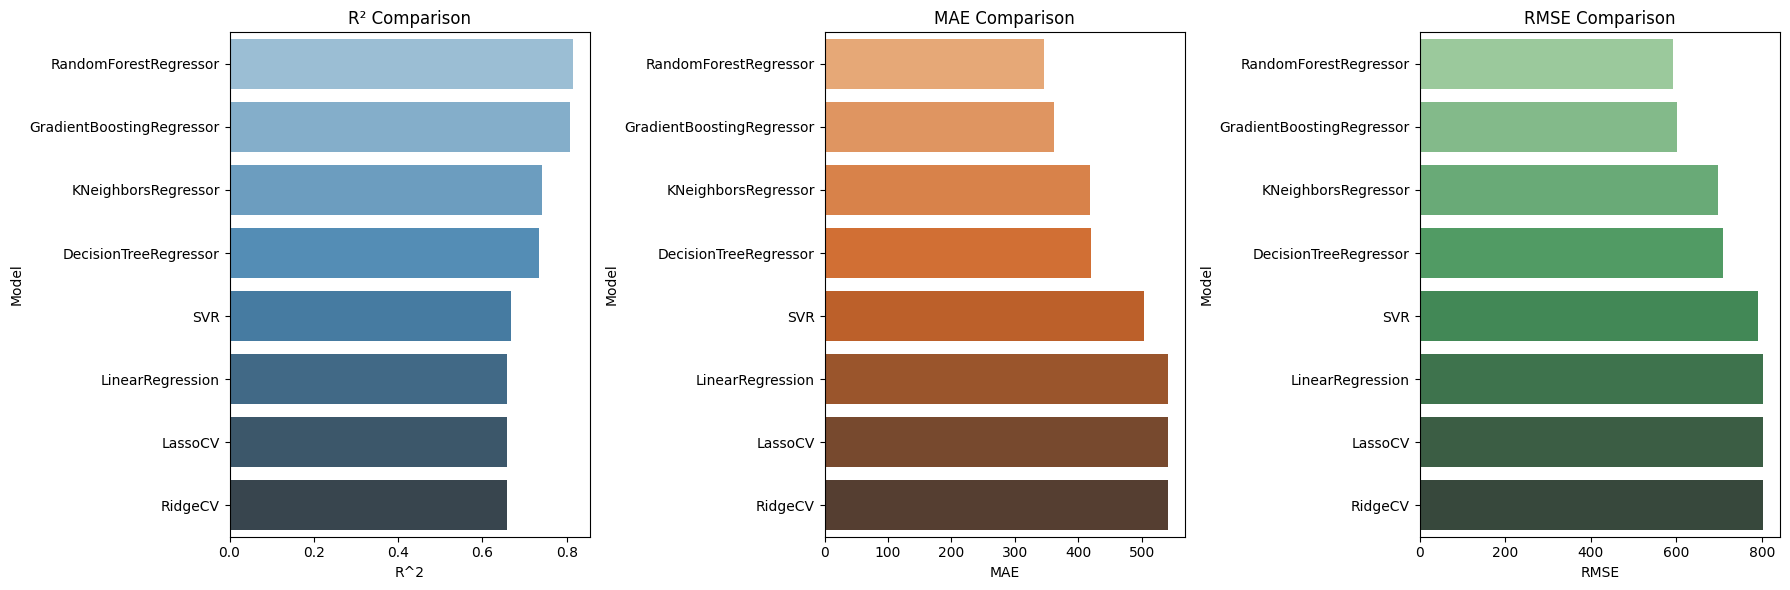

In [177]:
# –°—Ç–≤–æ—Ä—é—î–º–æ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—é –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è R^2
sns.barplot(x='R^2', y='Model', data=results_df, ax=axes[0], palette="Blues_d", hue='Model', legend=False)
axes[0].set_title('R¬≤ Comparison')

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è MAE
sns.barplot(x='MAE', y='Model', data=results_df, ax=axes[1], palette="Oranges_d", hue='Model', legend=False)
axes[1].set_title('MAE Comparison')

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è RMSE
sns.barplot(x='RMSE', y='Model', data=results_df, ax=axes[2], palette="Greens_d", hue='Model', legend=False)
axes[2].set_title('RMSE Comparison')

plt.tight_layout()
plt.show()

###**–ö—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—è (cross_val_score)**
(—Ä–æ–∑–±–∏—Ç—Ç—è –¥–∞–Ω—ñ –Ω–∞ –∫—ñ–ª—å–∫–∞ —á–∞—Å—Ç–∏–Ω (—Ñ–æ–ª–¥—ñ–≤), –Ω–∞–≤—á–∞—î –º–æ–¥–µ–ª—å –Ω–∞ —á–∞—Å—Ç–∏–Ω—ñ –¥–∞–Ω–∏—Ö —ñ —Ç–µ—Å—Ç—É—î —ó—ó –Ω–∞ —ñ–Ω—à—ñ–π —á–∞—Å—Ç–∏–Ω—ñ). –î–æ–ø–æ–º–∞–≥–∞—î –æ—Ü—ñ–Ω–∏—Ç–∏ –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ –Ω–∞ —Ä—ñ–∑–Ω–∏—Ö –≤–∏–±—ñ—Ä–∫–∞—Ö, —É–Ω–∏–∫–Ω—É—Ç–∏ overfitting —ñ –≤–∏–±—Ä–∞—Ç–∏ –Ω–∞–π–∫—Ä–∞—â—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –ø–µ—Ä–µ–¥ –ø—ñ–¥–±–æ—Ä–æ–º –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤,–¥–æ–ø–æ–º–∞–≥–∞—î –æ—Ü—ñ–Ω–∏—Ç–∏ —Å—Ç–∞–±—ñ–ª—å–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ (—è–∫ –∑–º—ñ–Ω—é—î—Ç—å—Å—è —è–∫—ñ—Å—Ç—å –Ω–∞ —Ä—ñ–∑–Ω–∏—Ö —Ñ–æ–ª–¥–∞—Ö), –¥–∞—î –±—ñ–ª—å—à —Ç–æ—á–Ω—É –æ—Ü—ñ–Ω–∫—É –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ.




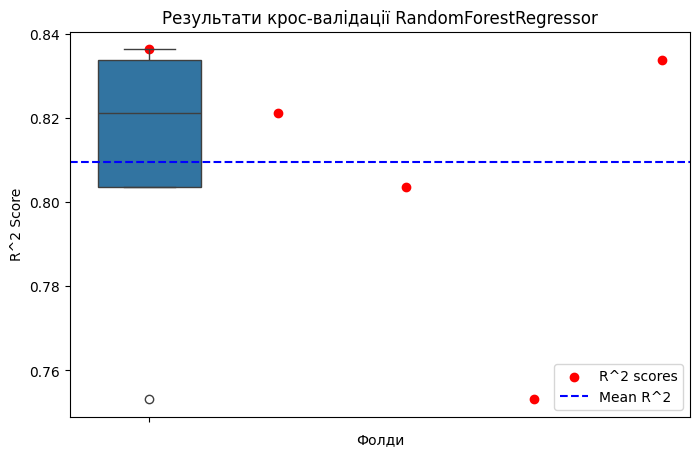

–°–µ—Ä–µ–¥–Ω—ñ–π R^2: 0.8096 ¬± 0.0305


In [138]:
# –û–±–∏—Ä–∞—î–º–æ –º–æ–¥–µ–ª—å
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# –í–∏–∫–æ–Ω—É—î–º–æ –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—é
cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)


plt.figure(figsize=(8, 5))
sns.boxplot(cv_scores)
plt.scatter(range(len(cv_scores)), cv_scores, color='red', label="R^2 scores")
plt.axhline(y=cv_scores.mean(), color='blue', linestyle='--', label="Mean R^2")
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç–∏ –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—ó RandomForestRegressor')
plt.ylabel('R^2 Score')
plt.xlabel('–§–æ–ª–¥–∏')
plt.legend()
plt.show()

# –í–∏–≤–µ–¥–µ–Ω–Ω—è —Å–µ—Ä–µ–¥–Ω—å–æ–≥–æ R^2 —Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è
print(f"–°–µ—Ä–µ–¥–Ω—ñ–π R^2: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

**–í–∏—Å–Ω–æ–≤–æ–∫**
-  RandomForestRegressor –¥–µ–º–æ–Ω—Å—Ç—Ä—É—î –≤–∏—Å–æ–∫—É —Ç–∞ —Å—Ç–∞–±—ñ–ª—å–Ω—É —è–∫—ñ—Å—Ç—å –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è (R¬≤ ‚âà 0.81).
- –í–∞—Ä—ñ–∞—Ü—ñ—è –º—ñ–∂ —Ñ–æ–ª–¥–∞–º–∏ –Ω–µ–≤–µ–ª–∏–∫–∞, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –¥–æ–±—Ä—É —É–∑–∞–≥–∞–ª—å–Ω—é–≤–∞–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ.
-  –û–¥–∏–Ω —ñ–∑ —Ñ–æ–ª–¥—ñ–≤ –º–∞—î –Ω–∏–∑—å–∫–µ –∑–Ω–∞—á–µ–Ω–Ω—è (~0.75), —â–æ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —á—É—Ç–ª–∏–≤—ñ—Å—Ç—å –¥–æ –ø–µ–≤–Ω–∏—Ö –ø—ñ–¥–º–Ω–æ–∂–∏–Ω –¥–∞–Ω–∏—Ö.

###–û—Ç—Ä–∏–º–∞–µ–º–æ –≤–∞–∂–ª–∏–≤–æ—Å—Ç—ñ –æ–∑–Ω–∞–∫ —É RandomForestRegressor
 –∞—Ç—Ä–∏–±—É—Ç–æ–º feature_importances_, —è–∫–∏–π –Ω–∞–¥–∞—î –æ—Ü—ñ–Ω–∫—É –≤–ø–ª–∏–≤—É –∫–æ–∂–Ω–æ—ó –æ–∑–Ω–∞–∫–∏ –Ω–∞ –º–æ–¥–µ–ª—å. –ß–∏–º –≤–∏—â–∏–π –∑–Ω–∞—á–µ–Ω–Ω—è –≤–∞–∂–ª–∏–≤–æ—Å—Ç—ñ, —Ç–∏–º –±—ñ–ª—å—à–∏–π –≤–ø–ª–∏–≤ –º–∞—î –æ–∑–Ω–∞–∫–∞ –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑.

In [178]:
# –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ RandomForest
rf_model.fit(X_train, Y_train)

# –û—Ç—Ä–∏–º–∞–Ω–Ω—è –≤–∞–∂–ª–∏–≤–æ—Å—Ç—ñ –æ–∑–Ω–∞–∫
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_RF': rf_model.feature_importances_
})

# –°–æ—Ä—Ç—É–≤–∞–Ω–Ω—è –∑–∞ –≤–∞–∂–ª–∏–≤—ñ—Å—Ç—é
rf_importance = rf_importance.sort_values(by='Importance_RF', ascending=False)

# –í–∏–≤–µ–¥–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
print(rf_importance)

                 Feature  Importance_RF
1                width_1       0.483947
4  designer_median_price       0.304552
0                depth_1       0.125897
2               height_1       0.053117
3  category_median_price       0.019265
5         other_colors_1       0.013222


**–í–∏—Å–Ω–≤–æ–∫** –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞–≤—à–∏ –¥–∞–Ω—ñ, –æ—Ç—Ä–∏–º–∞–ª–∏, —â–æ –Ω–∞–π–±—ñ–ª—å—à –≤–ø–ª–∏–≤–æ–≤–∏–º–∏ –∫–æ–ª–æ–Ω–∫–∞–º–∏ –¥–ª—è —Ñ–æ—Ä–º—É–≤–∞–Ω–Ω—è —Ü—ñ–Ω —î:
`width`, `designer`, `depth`

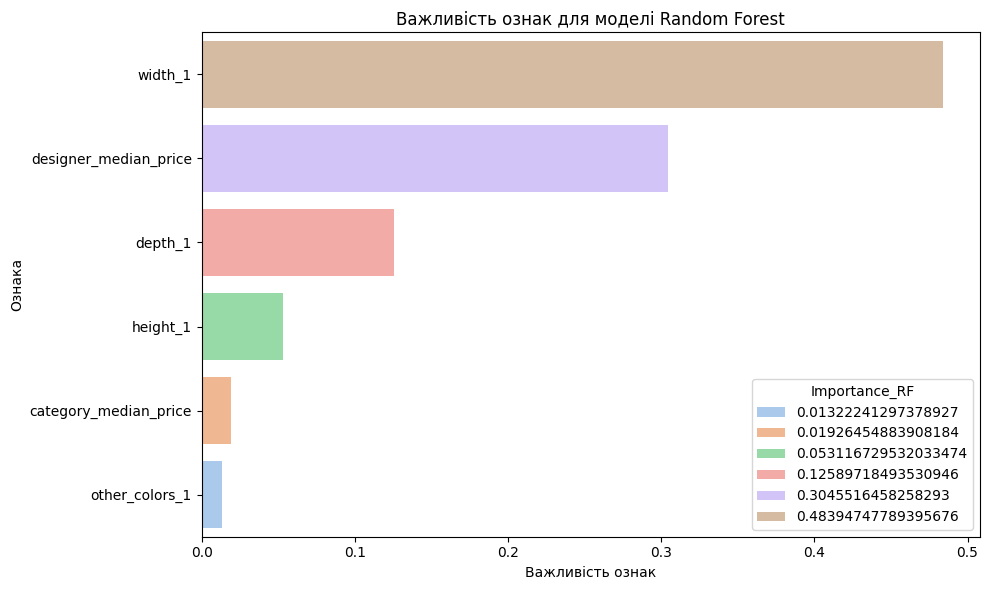

In [179]:
# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è –±–∞—Ä–ø–ª–æ—Ç—É –¥–ª—è –≤–∞–∂–ª–∏–≤–æ—Å—Ç—ñ –æ–∑–Ω–∞–∫
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_RF', y='Feature', data=rf_importance, hue='Importance_RF', palette="pastel")
plt.title('–í–∞–∂–ª–∏–≤—ñ—Å—Ç—å –æ–∑–Ω–∞–∫ –¥–ª—è –º–æ–¥–µ–ª—ñ Random Forest')
plt.xlabel('–í–∞–∂–ª–∏–≤—ñ—Å—Ç—å –æ–∑–Ω–∞–∫')
plt.ylabel('–û–∑–Ω–∞–∫–∞')
plt.tight_layout()
plt.show()